<div align='left'>
    STUDENT NAME: <b>Osagie Elliot Aibangbee</b><br>
    STUDENT NUMBER: <b>202115576</b><br>
    DEGREE PROGRAMME: <b>MSc in Artificial Intelligence and Data Science</b><br>
    YEAR OF STUDY: <b>2021</b><br>
    MODULE CODE:<b>771766</b><br>
    MODULE TITLE: <b>Fundamentals of Data Science PROJECT</b><br>
    DATE: <b>10-December-2021</b><br>
    ASSIGNMENT TITLE: <b>Census Project</b><br>
</div>

In [1]:
import os
import seaborn as sns
import copy

In [2]:
# Add current working directory to Python's sys path if not included
imp_mods = os.sys.path
my_pkg = os.getcwd()

if my_pkg not in imp_mods:
    imp_mods.append(my_pkg)
    print('Package imported.')

In [3]:
# import class CensusDataset from a customized module census_methods
from census_methods import CensusDataset as cd

In [4]:
# read-in data from csv file
census_df = sns.categorical.pd.read_csv('census_16_new - Copy.csv')

## <center> INITIAL OBSERVATIONS BEFORE CLEANING</center>

In [5]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7579 non-null   object
 1   Street                         7581 non-null   object
 2   First Name                     7579 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   object
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 5904 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
dtypes: object(11)
memory usage: 651.6+ KB


In [6]:
census_df.describe(include='all').transpose()

,count,unique,top,freq
House Number,7579,152,1,345
Street,7581,105,Wharf Wells,314
First Name,7579,370,Colin,36
Surname,7581,626,Smith,204
Age,7581,121,19,138
Relationship to Head of House,7581,20,Head,2879
Marital Status,5904,6,Single,2595
Gender,7581,8,Female,3932
Occupation,7581,1099,Student,1382
Infirmity,7581,8,None,7540


In [7]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Prison officer,None,None
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Futures trader,None,None
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,Male,Student,None,NaN
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Further education lecturer,None,None


### Check for missing values

In [8]:
missing_vals = cd.null_checker(census_df)

In [9]:
perc_missing = (100 * missing_vals/census_df.shape[0]).sort_values(ascending=False)
perc_missing
non_missing_vals = 100 - perc_missing
non_missing_vals

Religion                          77.351273
Marital Status                    77.878908
House Number                      99.973618
First Name                        99.973618
Street                           100.000000
Surname                          100.000000
Age                              100.000000
Relationship to Head of House    100.000000
Gender                           100.000000
Occupation                       100.000000
Infirmity                        100.000000
dtype: float64

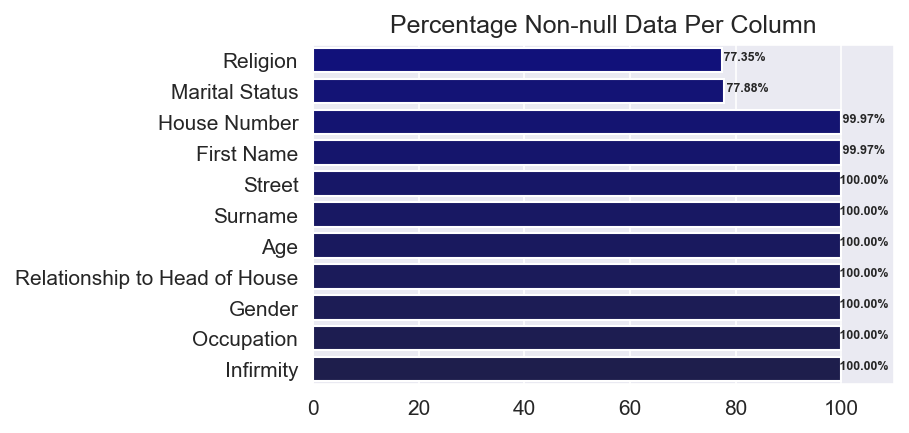

In [10]:
sns.set_style('darkgrid')

perc_missing_data_fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)

pal = sns.dark_palette('darkblue', 17, reverse=True)

plotted = sns.barplot(x=non_missing_vals, y=non_missing_vals.index, palette=pal)

plotted.set_title("Percentage Non-null Data Per Column")
plotted.set_xlim(0, 110, auto=True)

for i in range(len(non_missing_vals)):
    plotted.text(non_missing_vals[i]+4, i, f"{non_missing_vals[i]: 0.2f}%",
                fontsize=6, weight='bold', horizontalalignment='center')

# plotted.text(116, 0, "Missing (%)\n" +
#              "-"*20 + "\n" +
#             f"Marital Status: {perc_missing.loc['Marital Status']:0.2f}%\n" +
#              f"Religion: {perc_missing.loc['Religion']:0.2f}%\n",
#             fontsize=8, color='blue',
#              bbox={'facecolor': 'w', 'edgecolor': 'red', 'alpha': 0.3});

In [11]:
fname = 'total_nulls_per_col.png'
cd.fig_writer(fname, perc_missing_data_fig)

'total_nulls_per_col.png'

### Check for blank(s)

In [12]:
blanks = cd.check_for_empty_str(census_df)
print("Blanks in:")
for col, is_blank in blanks.items():
    if is_blank:
        print(f"\t{col}")

Blanks in:
	Surname
	Marital Status
	Gender
	Infirmity
	Religion


In [13]:
col_blanks = cd.col_blank_rows(census_df)

In [14]:
for col, blanks in col_blanks.items():
    print(f"{col}: {len(blanks)} rows at {blanks}")

Surname: 1 rows at [5058]
Marital Status: 1 rows at [2397]
Gender: 2 rows at [503, 2418]
Infirmity: 5 rows at [340, 3345, 3419, 4562, 5644]
Religion: 3 rows at [2432, 7000, 7034]


In [15]:
col_blanks

{'Surname': [5058],
 'Marital Status': [2397],
 'Gender': [503, 2418],
 'Infirmity': [340, 3345, 3419, 4562, 5644],
 'Religion': [2432, 7000, 7034]}

In [16]:
blanks = sns.categorical.pd.Series({col: len(blanks) for col, blanks in col_blanks.items()}).sort_values(ascending=False)
blanks

Infirmity         5
Religion          3
Gender            2
Surname           1
Marital Status    1
dtype: int64

In [17]:
perc_blank = sns.categorical.np.round(100 * blanks/census_df.shape[0], 2)
perc_blank

Infirmity         0.07
Religion          0.04
Gender            0.03
Surname           0.01
Marital Status    0.01
dtype: float64

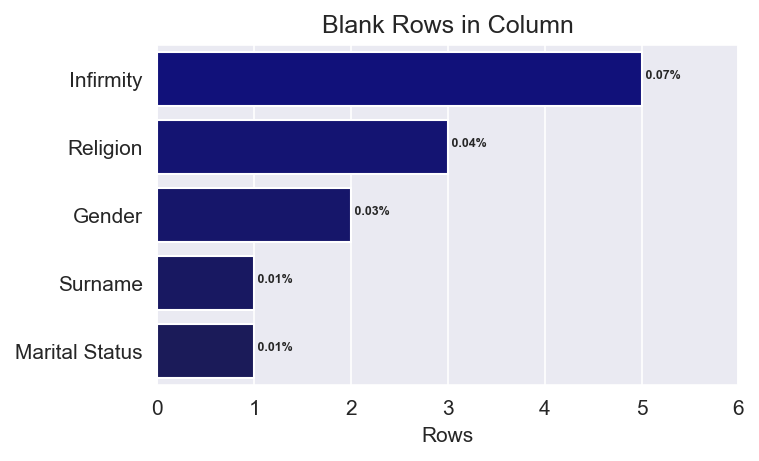

In [18]:
sns.set_style('darkgrid')

blank_data_fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)

pal = sns.dark_palette('darkblue', 10, reverse=True)

plotted = sns.barplot(x=blanks, y=blanks.index, palette=pal)

plotted.set_title("Blank Rows in Column")
plotted.set_xlim(0, 6)

for i in range(len(blanks)):
    plotted.text(blanks[i]+0.2, i, f"{perc_blank[i]: 0.2f}%",
                fontsize=6, weight='bold', horizontalalignment='center')

plotted.set_xlabel("Rows");

In [19]:
fname = 'total_blanks_per_column.png'
cd.fig_writer(fname, blank_data_fig)

'total_blanks_per_column.png'

### Unique Values

In [20]:
uniqs = cd.unique_categs(census_df)

In [21]:
num_uniq_per_col = sns.categorical.pd.Series({col: len(unq) for col, unq in uniqs.items()}).sort_values(ascending=False)
num_uniq_per_col

Occupation                       1099
Surname                           626
First Name                        371
House Number                      153
Age                               121
Street                            105
Relationship to Head of House      20
Religion                           15
Gender                              8
Infirmity                           8
Marital Status                      7
dtype: int64

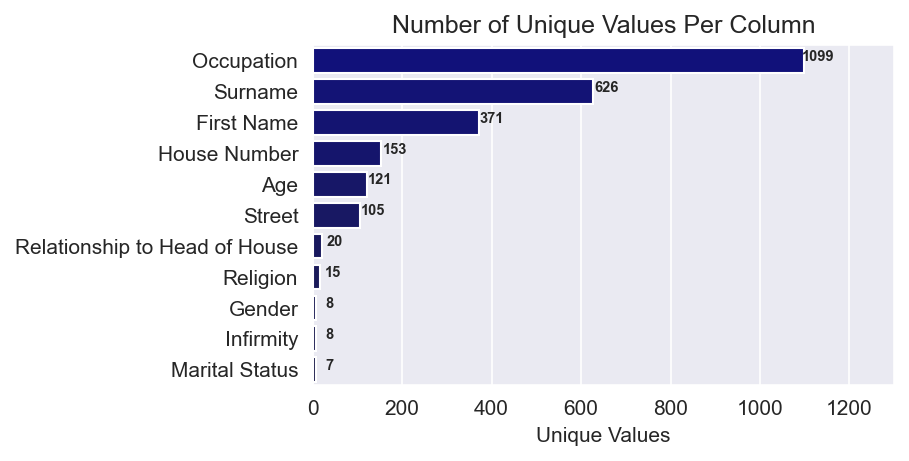

In [22]:
sns.set_style('darkgrid')
pal = sns.dark_palette('darkblue', 17, reverse=True)

unique_data_fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)

plotted = sns.barplot(x=num_uniq_per_col, y=num_uniq_per_col.index, palette=pal)

plotted.set_title("Number of Unique Values Per Column")
plotted.set_xlim(0, 1300, auto=True)

for i in range(len(num_uniq_per_col)):
    plotted.text(num_uniq_per_col[i]+30, i, f"{num_uniq_per_col[i]}",
                fontsize=7, weight='bold', horizontalalignment='center')

plotted.set_xlabel("Unique Values");

In [23]:
fname = 'unique_data_per_column.png'
cd.fig_writer(fname, unique_data_fig)

'unique_data_per_column.png'

### Data Consistency

In [24]:
print(uniqs['Occupation'])

['Prison officer', 'Futures trader', 'Student', 'Further education lecturer', 'Production assistant, television', 'Child', 'Retired Risk analyst', 'Retired Orthoptist', 'University Student', "Barrister's clerk", 'Nurse, adult', 'Retired Arts administrator', 'Retired Magazine features editor', 'Retired Customer service manager', 'Pharmacist, community', 'Scientist, water quality', 'Unemployed', 'Consulting civil engineer', 'Actuary', 'Housing manager/officer', 'Counsellor', 'Retired Air traffic controller', 'Television/film/video producer', 'Air traffic controller', 'Insurance account manager', 'Retired Ophthalmologist', 'Immunologist', 'Lecturer, higher education', 'Health promotion specialist', 'Retired Best boy', 'Retired Chemical engineer', 'Copywriter, advertising', 'Charity officer', 'Early years teacher', 'Exhibition designer', 'Sound technician, broadcasting/film/video', 'Energy manager', 'Pilot, airline', 'Merchant navy officer', 'Restaurant manager', 'Designer, multimedia', 'R

In [25]:
print(uniqs['Surname'])

['Bradley', 'Slater', "O'Brien", 'Palmer', 'Sutton', 'Marshall', 'Jones', 'Hanson', 'Smith', 'Nelson', 'Burns', 'Price', 'Doherty', 'Hargreaves', 'James', 'Webb', 'Johnson', 'Davies', 'Sharp', 'Green', 'Barnes', 'Martin', 'Patel', 'Brown', 'Gilbert', 'Lyons', 'Graham', 'Miles', 'Clarke', 'Field', 'Barker', 'Singh', 'Cameron', 'Murphy', 'Davis', 'Russell', 'Richardson', 'Potter', 'Edwards', 'Heath', 'Wong', 'Wood', 'Ferguson', 'Hughes', 'Tucker', 'Todd', 'Fisher', 'Dawson', 'Owens', 'Grant', 'Jade Alexander', 'Marsh', 'Adams', 'Blackburn', 'Knight', 'Young', 'Thomas', 'Carter', 'Freeman', 'Joyce', 'Hudson', 'Hyde', 'Rogers', 'Kirk', 'Pearson', 'Day', 'Wall', 'Burton', 'Shepherd', 'Dennis', 'Williamson-Hill', 'Payne-Williamson-Hill', 'Middleton', 'Hodgson', 'Rowe', 'Harris', 'Booth', 'Butler', 'Scott', 'Morrison', 'Nash', 'West', 'Simpson', 'Harrison-Simpson', 'Anderson', 'Morgan', 'Jackson', 'Lane', 'Morris', 'Duffy', 'Barber', 'Carr', 'Whittaker', 'Clark', 'Parker', 'Humphreys', 'Watki

In [26]:
print(uniqs['First Name'])

['Andrea', 'Peter', 'Lauren', 'Henry', 'Edward', 'Melanie', 'Lucy', 'Tina', 'Jeremy', 'Suzanne', 'Pamela', 'Justin', 'Benjamin', 'Julian', 'Beverley', 'Bethan', 'Marcus', 'Cheryl', 'Bernard', 'Scott', 'Bruce', 'Danielle', 'Bryan', 'Glenn', 'Melissa', 'Charlie', 'Graeme', 'Bethany', 'Frank', 'Denise', 'Jason', 'Kate', 'Simon', 'Jay', 'Daniel', 'Rosie', 'Marc', 'Christine', 'Helen', 'Lynne', 'Russell', 'Harriet', 'Jeffrey', 'Brian', 'Sylvia', 'Gareth', 'Ruth', 'Katy', 'Liam', 'Alexandra', 'Laura', 'Mohamed', 'Irene', 'Abigail', 'Adrian', 'Anna', 'Samantha', 'Dennis', 'Oliver', 'Robin', 'Sarah', 'Geraldine', 'Dawn', 'Annette', 'Alison', 'Kirsty', 'Tom', 'Jenna', 'Martin', 'Jennifer', 'Jake', 'Derek', 'Joshua', 'Kayleigh', 'Terence', 'Jade', nan, 'Vincent', 'Nathan', 'Vanessa', 'Eric', 'Clive', 'Janet', 'Paula', 'Patricia', 'Philip', 'Diane', 'Beth', 'Georgia', 'Maria', 'Hazel', 'Natalie', 'Duncan', 'Shirley', 'Clifford', 'Darren', 'Jayne', 'Joanne', 'Heather', 'Carly', 'Raymond', 'Trevor'

In [27]:
print(uniqs['House Number'])

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', 'Two', 'One', nan]


In [28]:
print(uniqs['Age'])

['43', '44', '5', '25', '24', '3', '105', '73', '19', '10', '57', '30', '2', '88', '85', '52', '56', '28', '47', '20', '75', '59', '42', '61', '67', '66', '76', '77', '50', '26', '27', '55', '53', '29', '11', '22', '64', '68', '38', '34', '32', '37', '13', '69', '81', '60', '72', '31', '54', '83', '41', '39', '33', '4', '48', '62', '70', '46', '16', '84', '65', '15', '21', '40', '14', '12', '23', '74', '7', '51', '92', '6', '45', '63', '18', '36', '55.55', '17', '9', '71', 'Four', '49', '0', '80', '89', '91', '35', '1.75', 'One', '58', '8', '1', '82', '79', '98', '100', '78', '94', '104', '96', '86', '87', '58.5088688', '0.5', '103', '93', '119', '90', '106', '55.52492408', '56.52492408', '131', '107', '55.27579403', '57.27579403', '99', '97', '-1', '95', '55.63583519', '59.22686093']


In [29]:
print(uniqs['Street'])

['Simmons Meadow', 'Morgan Avenue', 'Pillar Road', 'Wharf Place', 'Blue Spring', 'Stirling View', 'Smith Street', 'Griffiths Inlet', 'Shrine Harbor', 'Rees Locks', 'Dixon Drive', 'Howell Drive', 'Wharf Wells', 'Queen Avenue', 'Tegid Street', 'Chandler Drive', 'Adams Ways', 'Guardian Road', 'Runnymede Harbors', 'Coconutbelt Lane', 'North Road', 'Hall Lane', 'George Pass', 'Elizabeth Lane', 'Belle Center', 'Bell Orchard', 'Brooks Road', 'Windsor Avenue', 'Paladin Summit', 'Wright Brook', 'Green Wall', 'Doherty Extensions', 'Shillingcut Lane', 'February Street', 'Regent Lane', 'Mason Prairie', 'Scotland Avenue', 'Butterfly Avenue', 'Mary Drive', 'Mercia Underpass', 'Halfcrown Terrace', 'Oyster Road', 'Campbell Station', 'Parry Manor', 'Price Lane', 'Taylor Gateway', 'Brightwater Drive', 'Peacock Neck', 'Clayton Brooks', 'Portsmouth Park', 'Smith Manors', 'Spencer Avenue', 'Clementine Points', 'Guild Lane', 'Cancerpath Drive', 'Albion Springs', 'Duchess Street', 'Dockers Fords', 'Edwards F

In [30]:
print(uniqs['Relationship to Head of House'])

['Head', 'Husband', 'Daughter', 'Son', 'Lodger', 'Granddaughter', 'Grandson', 'Wife', 'None', 'Partner', 'Neice', 'Sibling', 'Visitor', 'Adopted Daughter', 'Step-Son', 'Cousin', 'Adopted Son', 'Step-Daughter', 'Son-in-law', 'Nephew']


In [31]:
print(uniqs['Religion'])

['None', nan, 'Christian', 'Catholic', 'Muslim', 'Methodist', 'Jewish', 'Jedi', 'Sikh', 'Bahai', 'Agnostic', 'Undecided', ' ', 'Baptist', 'Private']


In [32]:
print(uniqs['Gender'])

['Female', 'Male', 'F', 'M', 'Fe-male', 'MALE', ' ', 'FEMALE']


In [33]:
print(uniqs['Infirmity'])

['None', 'Mental Disability', 'Physical Disability', 'Deaf', ' ', 'Disabled', 'Unknown Infection', 'Blind']


In [34]:
print(uniqs['Marital Status'])

['Married', nan, 'Divorced', 'Widowed', 'Single', 'Di-vorced', ' ']


___

___

## <center> CLEANING</center>

___

### House Number

In [35]:
# create a copy of house number series to avoid making
# unwanted changes to the main dataframe
house_num = copy.deepcopy(census_df['House Number'])

In [36]:
# check for empty string
cd.check_for_empty_str(census_df)['House Number']

False

**NOTE:**<br>
No blanks in the House Number column<br><br>

In [37]:
# check for nan values
cd.null_checker(house_num)

2

**NOTE:**<br>
There are two nan values in the House Number column<br><br>

In [38]:
# unique values per column
print(house_num.unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124'
 '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135' '136'
 '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147' '148'
 '149' '150' 'Two' 'One' nan]


<br><br>Before we can change the datatype of house number to int, we must first make sure that all of its values are convertible to integers

#### Change spellings to numbers

In [39]:
converter = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
house_num = cd.transform_val(house_num, converter)

In [40]:
# look at owners of missing house numbers
null_house_num = census_df.loc[house_num.isnull()]
null_house_num

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7366,NaN,Chester Lane,Dominic,Murphy,10,Son,NaN,Male,Student,None,NaN
7445,NaN,Chester Lane,Charlene,Bibi,61,Head,Married,Female,Planning and development surveyor,None,None


<br><br>The two people with missing house numbers seem to live on the same street. While one is the head, the other is a son.<br>
Let's check for other occupants of the same house holds using Street and Surname

In [41]:
surnames = null_house_num['Surname'].values
streets = null_house_num['Street'].values
census_df.loc[(census_df['Surname'].isin(surnames)) & (census_df['Street'].isin(streets))]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7364,13,Chester Lane,Gregory,Murphy,43,Head,Married,Male,"Secretary, company",None,None
7365,13,Chester Lane,Abbie,Murphy,39,Wife,Married,Female,Landscape architect,None,None
7366,NaN,Chester Lane,Dominic,Murphy,10,Son,NaN,Male,Student,None,NaN
7367,13,Chester Lane,Catherine,Murphy,8,Daughter,NaN,Female,Student,None,NaN
7444,35,Chester Lane,Francis,Murphy,56,Head,Single,Male,"Journalist, newspaper",None,Methodist
7445,NaN,Chester Lane,Charlene,Bibi,61,Head,Married,Female,Planning and development surveyor,None,None
7446,36,Chester Lane,Abdul,Bibi,60,Husband,Married,Male,Engineering geologist,None,None
7447,36,Chester Lane,Andrew,Bibi,33,Son,Single,Male,"Research officer, trade union",None,None
7448,36,Chester Lane,Kelly,Bibi,29,Daughter,Single,Female,Environmental health practitioner,None,None


<br><br>We can see that the Murphys are a household of 4 occupants (at house number: 13): Husband/Father, Wife/Mother, Son and Daughter.<br>
Albeit, there is a fifth person with surname Murphy, however, he has a different house number from the other Murphys and single.<br>Likewise for the Bibis, they are also a household of 4 occupants (at house number: 36): Head/Wife, Husband, Son and Daughter.<br>***Thus, a reasonable assumption is that Dominic Murphy's house number is 13. <br>And Charlene Bibi's house number is 36***

In [42]:
# assign Dominic Murphy, a house number 13
house_num.loc[null_house_num.loc[null_house_num['Surname'] == 'Murphy'].index] = str(13)

In [43]:
# assign Charlene Bibi, a house number 36
house_num.loc[null_house_num.loc[null_house_num['Surname'] == 'Bibi'].index] = str(36)

In [44]:
# check for replacement
house_num.loc[null_house_num.index]

7366    13
7445    36
Name: House Number, dtype: object

In [45]:
# check for missing values
print(house_num.unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109' '110' '111' '112'
 '113' '114' '115' '116' '117' '118' '119' '120' '121' '122' '123' '124'
 '125' '126' '127' '128' '129' '130' '131' '132' '133' '134' '135' '136'
 '137' '138' '139' '140' '141' '142' '143' '144' '145' '146' '147' '148'
 '149' '150']


#### The House number series now looks ready to be casted to type int

In [46]:
# cast house_num series to type int
house_num = sns.categorical.pd.to_numeric(house_num)

In [47]:
print(house_num.unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]


#### Replace the old "House Number" column in the original census_df dataframe with cleaned series, "house_num".

In [48]:
census_df['House Number'] = house_num

In [49]:
census_df.dtypes

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

___

### Street

In [50]:
# check for nan values
cd.null_checker(census_df['Street'])

0

In [51]:
# check for empty string
cd.check_for_empty_str(census_df)['Street']

False

In [52]:
# check out the unique values
print(cd.unique_categs(census_df)['Street'])

['Simmons Meadow', 'Morgan Avenue', 'Pillar Road', 'Wharf Place', 'Blue Spring', 'Stirling View', 'Smith Street', 'Griffiths Inlet', 'Shrine Harbor', 'Rees Locks', 'Dixon Drive', 'Howell Drive', 'Wharf Wells', 'Queen Avenue', 'Tegid Street', 'Chandler Drive', 'Adams Ways', 'Guardian Road', 'Runnymede Harbors', 'Coconutbelt Lane', 'North Road', 'Hall Lane', 'George Pass', 'Elizabeth Lane', 'Belle Center', 'Bell Orchard', 'Brooks Road', 'Windsor Avenue', 'Paladin Summit', 'Wright Brook', 'Green Wall', 'Doherty Extensions', 'Shillingcut Lane', 'February Street', 'Regent Lane', 'Mason Prairie', 'Scotland Avenue', 'Butterfly Avenue', 'Mary Drive', 'Mercia Underpass', 'Halfcrown Terrace', 'Oyster Road', 'Campbell Station', 'Parry Manor', 'Price Lane', 'Taylor Gateway', 'Brightwater Drive', 'Peacock Neck', 'Clayton Brooks', 'Portsmouth Park', 'Smith Manors', 'Spencer Avenue', 'Clementine Points', 'Guild Lane', 'Cancerpath Drive', 'Albion Springs', 'Duchess Street', 'Dockers Fords', 'Edwards F

**NOTE:**<br>
Street column does not require any cleaning, as there isn't any empty string, nan, nor inconsistent values in the column.

___

### Address

Create new "Address" feature by combining "House Number" and "Street" of each occupant<br>
**NOTE:** An "Address" feature would facilitate easier and faster access to unique households

In [53]:
address = census_df.apply(lambda df: f"{df['House Number']}, {df['Street']}", axis=1)
address

0       1, Simmons Meadow
1       1, Simmons Meadow
2       1, Simmons Meadow
3       1, Simmons Meadow
4       1, Simmons Meadow
              ...        
7576       1, Newry Spire
7577       1, Newry Spire
7578       1, Newry Spire
7579       1, Newry Spire
7580       1, Newry Spire
Length: 7581, dtype: object

#### Make address series a new column in the census_df

In [54]:
census_df['Address'] = address

___

#### checking the new structure of census_df

In [55]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7579 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   object
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 5904 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
dtypes: int64(1), object(11)
memory usage: 710.8+ KB


In [56]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,Female,Prison officer,None,None,"1, Simmons Meadow"
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,Male,Futures trader,None,None,"1, Simmons Meadow"
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN,"1, Simmons Meadow"
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,Male,Student,None,NaN,"1, Simmons Meadow"
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,Male,Further education lecturer,None,None,"1, Simmons Meadow"


___

#### Save dataframe changes to filesystem as csv file

In [57]:
fname = 'house_num_and_street_cleaned.csv'
census_df.to_csv(fname, index=False)

___

### Gender

In [58]:
gend = copy.deepcopy(census_df['Gender'])

In [59]:
print(gend.unique())

['Female' 'Male' 'F' 'M' 'Fe-male' 'MALE' ' ' 'FEMALE']


#### Fix inconsistent gender values

In [60]:
converter = {'Female': 'F', 'Fe-male': 'F', 'FEMALE': 'F', 'MALE': 'M', 'Male': 'M'}
gend = cd.transform_val(gend, converter)

In [61]:
print(gend.unique())

['F' 'M' ' ']


In [62]:
# check for nan values
cd.null_checker(gend)

0

No blank/empty string in the Gender column

In [63]:
# check for blanks
cd.check_for_empty_str(census_df)['Gender']

True

<br><br>Gender column contains blank(s)

#### Fix blank genders

In [64]:
# Take a look at those having blank genders
blank_gends = census_df.loc[gend.loc[gend == ' '].index]
blank_gends

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
503,32,Griffiths Inlet,Wendy,Mann,34,Wife,Married,,Occupational psychologist,None,Christian,"32, Griffiths Inlet"
2418,25,Green Wall,Guy,Moore,31,Son,Single,,"Scientist, research (physical sciences)",None,None,"25, Green Wall"


Now we can easily tell their genders from their "Relationship to Head of House" column.<br>
***Wendy Mann is a wife - likely a female.<br>
Guy Moore is a son - likely a male.***

In [65]:
# assign Wendy Mann to gender F (female)
gend.loc[blank_gends.loc[(blank_gends['Surname'] == 'Mann') & (blank_gends['First Name'] == 'Wendy')].index] = 'F'

In [66]:
# assign Guy Moore to gender M (male)
gend.loc[blank_gends.loc[(blank_gends['Surname'] == 'Moore') & (blank_gends['First Name'] == 'Guy')].index] = 'M'

In [67]:
gend.loc[blank_gends.index]

503     F
2418    M
Name: Gender, dtype: object

In [68]:
print(gend.unique())

['F' 'M']


#### Replace the old "Gender" column in the original census_df dataframe with cleaned series, "gend".

In [69]:
census_df['Gender'] = gend

In [70]:
print(census_df['Gender'].unique())

['F' 'M']


___

### First Name

In [71]:
fnames = copy.deepcopy(census_df['First Name'])

In [72]:
# check for empty or blank strings
cd.check_for_empty_str(census_df)['First Name']

False

<br><br>No blank/empty string in the First Name column

In [73]:
# check for nan values
cd.null_checker(fnames)

2

<br><br>There are to 2 nan values in the First Name column

In [74]:
# Here they are:
null_fname = census_df.loc[census_df['First Name'].isnull()]
null_fname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
81,36,Morgan Avenue,NaN,Jade Alexander,32,Head,Divorced,F,Educational psychologist,None,Muslim,"36, Morgan Avenue"
1660,23,Belle Center,NaN,James Young,50,Husband,Married,M,"Education officer, museum",None,None,"23, Belle Center"


In [75]:
household_mems = dict()
for i in null_fname.index:
    household_mems[i] = census_df.loc[census_df['Address'] == null_fname.loc[i, 'Address']]

<br><br>For Jade Alexander

In [76]:
household_mems[81]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
81,36,Morgan Avenue,NaN,Jade Alexander,32,Head,Divorced,F,Educational psychologist,None,Muslim,"36, Morgan Avenue"


I think that Jade Alexander errorneously filled in her first name and last name in the surname textbox.<br>
Unfortunately there are no other occupants in her household which could have been used to confirm their surname.<br>
**However, I am convinced that her first name is Jade and surname is Alexander.** And shall proceed to effect this changes

In [77]:
fn, ln = null_fname['Surname'].str.split().loc[81]
fnames.loc[81] = fn
census_df.loc[81, 'Surname'] = ln

In [78]:
census_df.loc[81]

House Number                                           36
Street                                      Morgan Avenue
First Name                                            NaN
Surname                                         Alexander
Age                                                    32
Relationship to Head of House                        Head
Marital Status                                   Divorced
Gender                                                  F
Occupation                       Educational psychologist
Infirmity                                            None
Religion                                           Muslim
Address                                 36, Morgan Avenue
Name: 81, dtype: object

<br><br>For James Young:

In [79]:
household_mems[1660]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
1659,23,Belle Center,Georgia,Young,52,Head,Married,F,Water quality scientist,None,None,"23, Belle Center"
1660,23,Belle Center,NaN,James Young,50,Husband,Married,M,"Education officer, museum",None,None,"23, Belle Center"
1661,23,Belle Center,Vanessa,Young,16,Daughter,NaN,F,Student,None,NaN,"23, Belle Center"


From James Young's wife and daughter's surnames, I am certain that their surname is Young.<br>
**Thus, I shall assign his First name as James and Surname as Young**

In [80]:
fn, ln = null_fname['Surname'].str.split().loc[1660]
fnames.loc[1660] = fn
census_df.loc[1660, 'Surname'] = ln

In [81]:
census_df.loc[1660]

House Number                                            23
Street                                        Belle Center
First Name                                             NaN
Surname                                              Young
Age                                                     50
Relationship to Head of House                      Husband
Marital Status                                     Married
Gender                                                   M
Occupation                       Education officer, museum
Infirmity                                             None
Religion                                              None
Address                                   23, Belle Center
Name: 1660, dtype: object

In [82]:
census_df.loc[fnames.loc[fnames.str.contains("-")].index]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
1415,5,Coconutbelt Lane,Emily-Anne,Williams,47,Head,Married,F,"Engineer, building services",None,Methodist,"5, Coconutbelt Lane"
1456,4,North Road,Billy-Joel,Scott,28,Son,Single,M,Unemployed,None,None,"4, North Road"
5711,27,Calendar Ranch,Billy-Joe,Ali,11,Son,NaN,M,Student,None,NaN,"27, Calendar Ranch"


#### Fix in-between spaces

In [83]:
census_df.loc[fnames.loc[fnames.str.contains(" ")].index]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
7199,48,Aethelstan Prairie,Emily Anne,Lawrence,62,Head,Single,F,"Education officer, environmental",None,None,"48, Aethelstan Prairie"


**NOTE:**<br>
For sake of consistency, I shall replace any in-between spaces with a dash "-"

In [84]:
fnames.loc[fnames.str.contains(" ")] = fnames.str.replace(" ", "-")

In [85]:
fnames.loc[fnames.str.contains("-")]

1415    Emily-Anne
1456    Billy-Joel
5711     Billy-Joe
7199    Emily-Anne
Name: First Name, dtype: object

#### Replace the old "First Name" column in the original census_df dataframe with cleaned series, "fnames".

In [86]:
census_df['First Name'] = fnames

In [87]:
cd.null_checker(census_df['First Name'])

0

___

### Surname

In [88]:
lnames = copy.deepcopy(census_df['Surname'])

In [89]:
# check for nan values
cd.null_checker(lnames)

0

No nan values in the Surname column<br><br>

In [90]:
# check for empty or blank strings
cd.check_for_empty_str(census_df)['Surname']

True

In [91]:
# check for in-between spaces
lnames.loc[lnames.str.contains(" ")]

5058     
Name: Surname, dtype: object

<br><br>Surname columns contains blank(s).<br>
They are:

In [92]:
blank_lname = census_df.loc[census_df['Surname'] == ' ']
blank_lname

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
5058,114,James Views,Aaron,,34,Husband,Married,M,Data scientist,None,None,"114, James Views"


In [93]:
# look at surnames of other occupants in the same household
census_df.loc[census_df['Address'] == blank_lname.loc[5058, 'Address']]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address
5057,114,James Views,Andrea,James,33,Head,Married,F,Dealer,None,None,"114, James Views"
5058,114,James Views,Aaron,,34,Husband,Married,M,Data scientist,None,None,"114, James Views"
5059,114,James Views,Samantha,James,4,Daughter,NaN,F,Child,None,NaN,"114, James Views"


<br><br>It is clear that Aaron lives with his wife (Andrea) and daughter (Samantha), both of whose surname is James.<br>
**Hence, I shall be assigning the same surname, James, to Aaron.**

In [94]:
lnames.loc[5058] = 'James'

In [95]:
lnames.loc[lnames == ' ']

Series([], Name: Surname, dtype: object)

In [96]:
# check for in-between spaces
lnames.loc[lnames.str.contains("-")]

110            Williamson-Hill
111      Payne-Williamson-Hill
127           Harrison-Simpson
174              Kelly-Griffin
176              Kelly-Griffin
                 ...          
7478           Parker-Turnbull
7479           Parker-Turnbull
7480    Arnold-Parker-Turnbull
7532               Clark-Quinn
7566              Chapman-Cook
Name: Surname, Length: 271, dtype: object

#### Replace the old "Surname" column in the original census_df dataframe with cleaned series, "lnames".

In [97]:
census_df['Surname'] = lnames

In [98]:
# check for empty or blank strings
cd.check_for_empty_str(census_df)['Surname']

False

#### Save dataframe changes to filesystem as csv file

In [99]:
fname = "Name_and_Gender_cleaned.csv"
census_df.to_csv(fname, index=False)

___

### Relationship to Head of House

In [100]:
# check for empty string
cd.check_for_empty_str(census_df)['Relationship to Head of House']

False

No blanks in the Relationship to Head of House column<br><br>

In [101]:
# check for null values
cd.null_checker(census_df)['Relationship to Head of House']

0

No nan value in the Relationship to Head of House column<br><br>

In [102]:
# check out the unique values
print(cd.unique_categs(census_df)['Relationship to Head of House'])

['Head', 'Husband', 'Daughter', 'Son', 'Lodger', 'Granddaughter', 'Grandson', 'Wife', 'None', 'Partner', 'Neice', 'Sibling', 'Visitor', 'Adopted Daughter', 'Step-Son', 'Cousin', 'Adopted Son', 'Step-Daughter', 'Son-in-law', 'Nephew']


**NOTE:**<br>
'Relationship to Head of House' column does not require any cleaning, as there isn't any empty string, nan, nor inconsistent values in the column.

___

### Occupation

In [103]:
# check for null values
cd.null_checker(census_df)['Occupation']

0

No nan value in the Occupation column<br><br>

In [104]:
# check for empty string
cd.check_for_empty_str(census_df)['Occupation']

False

No blank in the Occupation column<br><br>

In [105]:
# check out the unique values
uniq_occups = cd.unique_categs(census_df)['Occupation']
print(f"There are {len(uniq_occups)} different occupations.\n" +
      f"They include:\n{uniq_occups}")

There are 1099 different occupations.
They include:
['Prison officer', 'Futures trader', 'Student', 'Further education lecturer', 'Production assistant, television', 'Child', 'Retired Risk analyst', 'Retired Orthoptist', 'University Student', "Barrister's clerk", 'Nurse, adult', 'Retired Arts administrator', 'Retired Magazine features editor', 'Retired Customer service manager', 'Pharmacist, community', 'Scientist, water quality', 'Unemployed', 'Consulting civil engineer', 'Actuary', 'Housing manager/officer', 'Counsellor', 'Retired Air traffic controller', 'Television/film/video producer', 'Air traffic controller', 'Insurance account manager', 'Retired Ophthalmologist', 'Immunologist', 'Lecturer, higher education', 'Health promotion specialist', 'Retired Best boy', 'Retired Chemical engineer', 'Copywriter, advertising', 'Charity officer', 'Early years teacher', 'Exhibition designer', 'Sound technician, broadcasting/film/video', 'Energy manager', 'Pilot, airline', 'Merchant navy office

___

### Is Retired

Using the "Occupation" of each resident, create "Retired" feature with values 0 or 1. Where 1 means retired, and 0 means the not retired.<br>
**NOTE:** A "Retired" column would make it easier and faster to determine the retirement status of each resident

In [106]:
retired = census_df['Occupation'].apply(lambda val: 1 if 'retired' in val.lower() else 0)
retired

0       0
1       0
2       0
3       0
4       0
       ..
7576    0
7577    0
7578    0
7579    0
7580    0
Name: Occupation, Length: 7581, dtype: int64

In [107]:
# check out the distribution of retired occupants
retired_distr = retired.value_counts()
retired_distr

0    6813
1     768
Name: Occupation, dtype: int64

In [108]:
# distribution of retired occupants in percentage
retired_distr_perc = sns.relational.np.round(100 * retired_distr/retired.shape[0], 2)
retired_distr_perc

0    89.87
1    10.13
Name: Occupation, dtype: float64

In [109]:
retired_distr.array

<PandasArray>
[6813, 768]
Length: 2, dtype: int64

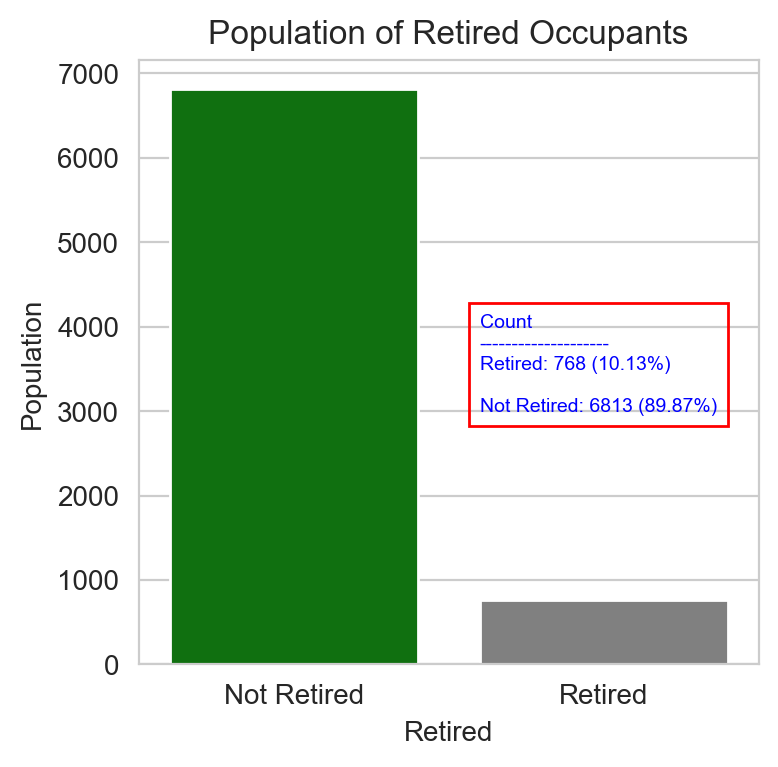

In [110]:
sns.set_style(style='whitegrid')
retired_population_fig = sns.categorical.plt.figure(figsize=(4, 4), dpi=200)
# l, r = retired_population_fig.add_axes([0, 0, .6, .95]), retired_population_fig.add_axes([0.75, 0, .6, .95])

freq = sns.barplot(x=retired_distr.index, y=retired_distr, 
                   palette={0:'green',
                           1:'grey'})
# perc = sns.barplot(x=retired_distr_perc.index, y=retired_distr_perc, ax=r)

freq.set_ylabel('Population'), freq.set_xlabel('Retired')
# perc.set_ylabel('%Population'), perc.set_xlabel('Retired')

freq.set_title("Population of Retired Occupants")
# perc.set_title("Population of Retired Occupants (in %)")

freq.text(0.6, 3000, "Count\n" +
          "-"*20 + "\n" +
          f"Retired: {retired_distr.loc[1]} ({retired_distr_perc.loc[1]}%)" + "\n\n" +
         f"Not Retired: {retired_distr.loc[0]} ({retired_distr_perc.loc[0]}%)",
         bbox={'facecolor': 'none', 'edgecolor': 'red'},
         fontsize=7, color='blue')
freq.set_xticklabels(['Not Retired', 'Retired'])

sns.categorical.plt.show()

In [111]:
fname = 'retired_population.png'
cd.fig_writer(fname, retired_population_fig)

'retired_population.png'

#### Make the "retired" series a new column in the census_df

In [112]:
census_df['Is Retired'] = retired

___

### Is Student

Using the "Occupation" of each resident, create "Is Student" feature with values 0 or 1. Where 1 means that an individual is a student, and 0 means otherwise.<br>
**NOTE:** "Is Student" column would make it easier and faster to determine if each resident is a student

In [113]:
students = census_df['Occupation'].apply(lambda val: 1 if "student" in val.lower() else 0)
students

0       0
1       0
2       1
3       1
4       0
       ..
7576    0
7577    1
7578    1
7579    1
7580    0
Name: Occupation, Length: 7581, dtype: int64

In [114]:
# check out the distribution of students occupants
students_distr = students.value_counts()
students_distr

0    5694
1    1887
Name: Occupation, dtype: int64

In [115]:
# distribution of students occupants in percentage
students_distr_perc = sns.relational.np.round(100 * students_distr/students.shape[0], 2)
students_distr_perc

0    75.11
1    24.89
Name: Occupation, dtype: float64

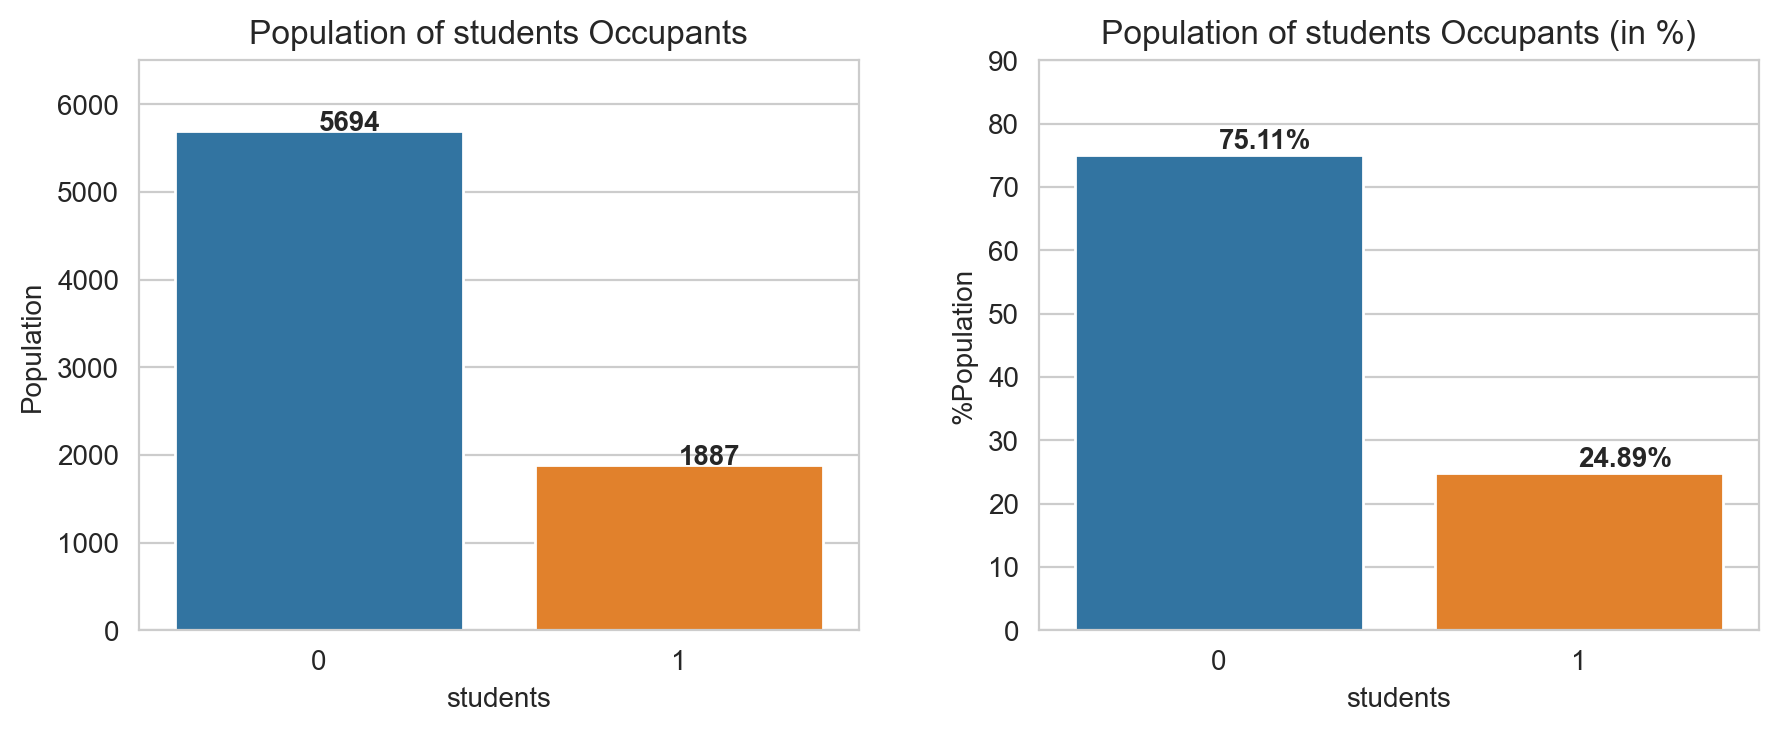

In [116]:
students_population_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
l, r = students_population_fig.add_axes([0, 0, .6, .95]), students_population_fig.add_axes([0.75, 0, .6, .95])

freq = sns.barplot(x=students_distr.index, y=students_distr, ax=l)
perc = sns.barplot(x=students_distr_perc.index, y=students_distr_perc, ax=r)

freq.set_ylabel('Population'), freq.set_xlabel('students')
perc.set_ylabel('%Population'), perc.set_xlabel('students')

freq.set_title("Population of students Occupants")
perc.set_title("Population of students Occupants (in %)")

for i in range(len(students_distr.index)):
    freq.text(i, students_distr[i]+1, f"{students_distr[i]}", weight='bold')
    perc.text(i, students_distr_perc[i]+1, f"{students_distr_perc[i]}%", weight='bold')
    
freq.set_ylim(0, 6500)
perc.set_ylim(0, 90)

sns.categorical.plt.show()

In [117]:
census_df['Is Student'] = students

In [118]:
fname = 'students_population_figure.png'
cd.fig_writer(fname, students_population_fig)

'students_population_figure.png'

___

### Is Unemployed

Using the "Occupation" of each resident, create "Is Unemployed" feature with values 0 or 1. Where 1 means an individual is unemployed, and 0 means that individual is not unemployed.<br>
**NOTE:** An "Is Unemployed" column would make it easier and faster to determine the employment status of each resident

In [119]:
unemployed = census_df['Occupation'].apply(lambda val: 1 if val.lower() == 'unemployed' else 0)
unemployed

0       0
1       0
2       0
3       0
4       0
       ..
7576    1
7577    0
7578    0
7579    0
7580    0
Name: Occupation, Length: 7581, dtype: int64

In [120]:
# check out the distribution of employed occupants
unemployed_distr = unemployed.value_counts()
unemployed_distr

0    7046
1     535
Name: Occupation, dtype: int64

In [121]:
# distribution of employed occupants in percentage
unemployed_distr_perc = sns.relational.np.round(100 * unemployed_distr/unemployed.shape[0], 2)
unemployed_distr_perc

0    92.94
1     7.06
Name: Occupation, dtype: float64

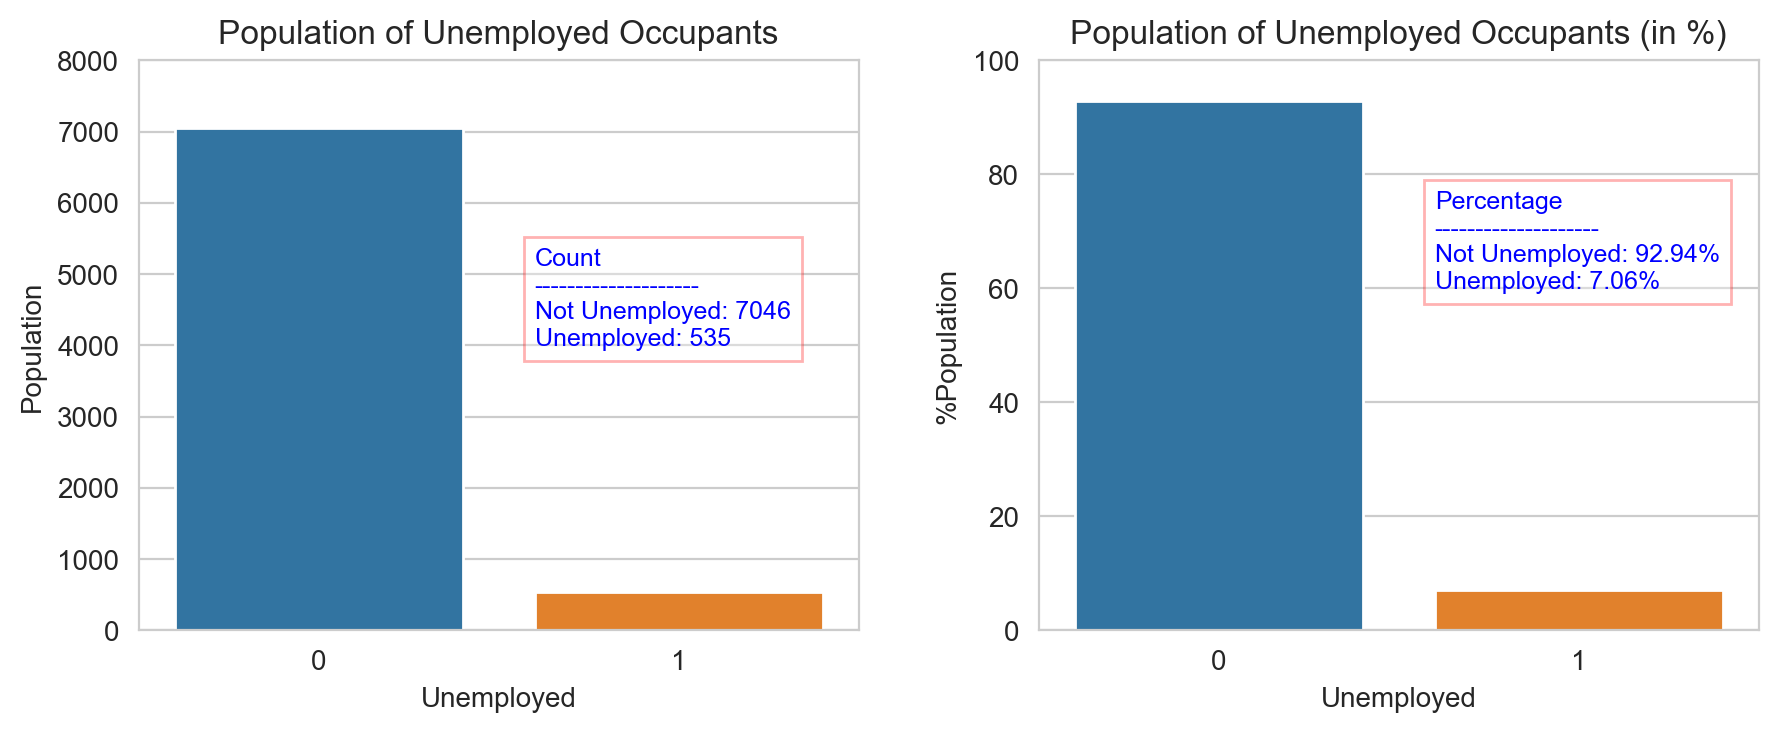

In [122]:
employed_population_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
l, r = employed_population_fig.add_axes([0, 0, .6, .95]), employed_population_fig.add_axes([0.75, 0, .6, .95])

freq = sns.barplot(x=unemployed_distr.index, y=unemployed_distr, ax=l)
perc = sns.barplot(x=unemployed_distr_perc.index, y=unemployed_distr_perc, ax=r)

freq.set_ylabel('Population'), freq.set_xlabel('Unemployed')
perc.set_ylabel('%Population'), perc.set_xlabel('Unemployed')

freq.set_title("Population of Unemployed Occupants")
perc.set_title("Population of Unemployed Occupants (in %)")

freq.text(0.6, 4000, "Count\n" +
          "-"*20 + "\n" +
          f"Not Unemployed: {unemployed_distr.loc[0]}" + "\n" +
         f"Unemployed: {unemployed_distr.loc[1]}",
         bbox={'facecolor': 'w', 'edgecolor': 'red', 'alpha': 0.3},
         fontsize=9, color='blue')

perc.text(0.6, 60, "Percentage\n" +
          "-"*20 + "\n" +
          f"Not Unemployed: {unemployed_distr_perc.loc[0]}%" + "\n" +
         f"Unemployed: {unemployed_distr_perc.loc[1]}%",
         bbox={'facecolor': 'w', 'edgecolor': 'red', 'alpha': 0.3},
         fontsize=9, color='blue')

freq.set_ylim(0, 8000)
perc.set_ylim(0, 100)
sns.categorical.plt.show()

#### Save figure to filesystem as PNG file

In [123]:
fname = 'employed_population_figure.png'
cd.fig_writer(fname, employed_population_fig)

'employed_population_figure.png'

#### Make the "unemployed" series a new column in the census_df

In [124]:
census_df['Is Unemployed'] = unemployed

In [125]:
census_df = census_df[['House Number', 'Street', 'First Name', 'Surname', 
                       'Age', 'Relationship to Head of House', 'Marital Status', 'Gender', 
                       'Occupation', 'Infirmity', 'Religion', 'Address',
                       'Is Retired', 'Is Unemployed', 'Is Student']]

In [126]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   object
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 5904 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
 12  Is Retired                     7581 non-null   int64 
 13  Is 

In [127]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,None,"1, Simmons Meadow",0,0,0
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,None,"1, Simmons Meadow",0,0,0
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN,"1, Simmons Meadow",0,0,1
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,M,Student,None,NaN,"1, Simmons Meadow",0,0,1
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,None,"1, Simmons Meadow",0,0,0


___

#### Save dataframe changes to filesystem as csv file

In [128]:
fname = "Occupation_and_Rel_to_HH_cleaned.csv"
census_df.to_csv(fname, index=False)

___

### Infirmity

In [129]:
# check for null values
cd.null_checker(census_df)['Infirmity']

0

No nan value in the Infirmity column<br><br>

In [130]:
# check for empty string
cd.check_for_empty_str(census_df)['Infirmity']

True

In [131]:
infirmity = copy.deepcopy(census_df['Infirmity'])

Infirmity column contains blank(s).<br>
They are:

In [132]:
blank_infirmity = census_df.loc[infirmity.loc[(infirmity == ' ') | 
                                           (infirmity == '')].index]
blank_infirmity

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
340,2,Stirling View,Edward,Chan,44,Son,Single,M,Photographer,,Christian,"2, Stirling View",0,0,0
3345,28,Brightwater Drive,Megan,Jones,51,Head,Single,F,"Designer, textile",,Christian,"28, Brightwater Drive",0,0,0
3419,7,Peacock Neck,Kirsty,Simpson,22,Daughter,Widowed,F,University Student,,Catholic,"7, Peacock Neck",0,0,1
4562,6,Friaryrow Street,Debra,Wilkinson,5,Daughter,NaN,F,Student,,NaN,"6, Friaryrow Street",0,0,1
5644,8,Calendar Ranch,Jay,Smith,64,Husband,Married,M,Architectural technologist,,Christian,"8, Calendar Ranch",0,0,0


#### Fix blank Infirmity

In this situation, a blank/empty string in the Infirmity column simply means we DO NOT KNOW whether or not that individual has an infirmity.<br>
Therefore, I shall be using **'Undisclosed'** as a placeholder for blanks/empty strings.
<br><br>

In [133]:
infirmity.loc[blank_infirmity.index] = 'Undisclosed'

In [134]:
# checking blank entries
infirmity.loc[blank_infirmity.index]

340     Undisclosed
3345    Undisclosed
3419    Undisclosed
4562    Undisclosed
5644    Undisclosed
Name: Infirmity, dtype: object

In [135]:
print(infirmity.unique())

['None' 'Mental Disability' 'Physical Disability' 'Deaf' 'Undisclosed'
 'Disabled' 'Unknown Infection' 'Blind']


**NOTE:**<br>
Blindness and deafness are both forms of physical disability.<br>
Therefore, I shall include the blind and deaf to the Physically Disability category.<br><br>

In [136]:
infirmity.loc[(infirmity == "Blind") |
             (infirmity == "Deaf")] = "Physical Disability"

In [137]:
print(infirmity.unique())

['None' 'Mental Disability' 'Physical Disability' 'Undisclosed' 'Disabled'
 'Unknown Infection']


In [138]:
infirmity_freq = infirmity.value_counts()
print(infirmity_freq)

None                   7540
Physical Disability      24
Mental Disability         5
Undisclosed               5
Unknown Infection         5
Disabled                  2
Name: Infirmity, dtype: int64


In [139]:
infirmity_freq_perc = sns.categorical.np.round(100 * infirmity_freq/infirmity.shape[0], 3)
print(infirmity_freq_perc)

None                   99.459
Physical Disability     0.317
Mental Disability       0.066
Undisclosed             0.066
Unknown Infection       0.066
Disabled                0.026
Name: Infirmity, dtype: float64


In [140]:
minority_freq = infirmity_freq.loc[infirmity_freq < 0.1*infirmity.shape[0]]
minority_freq

Physical Disability    24
Mental Disability       5
Undisclosed             5
Unknown Infection       5
Disabled                2
Name: Infirmity, dtype: int64

In [141]:
minority_freq_perc = infirmity_freq_perc.loc[infirmity_freq_perc < 10]
minority_freq_perc

Physical Disability    0.317
Mental Disability      0.066
Undisclosed            0.066
Unknown Infection      0.066
Disabled               0.026
Name: Infirmity, dtype: float64

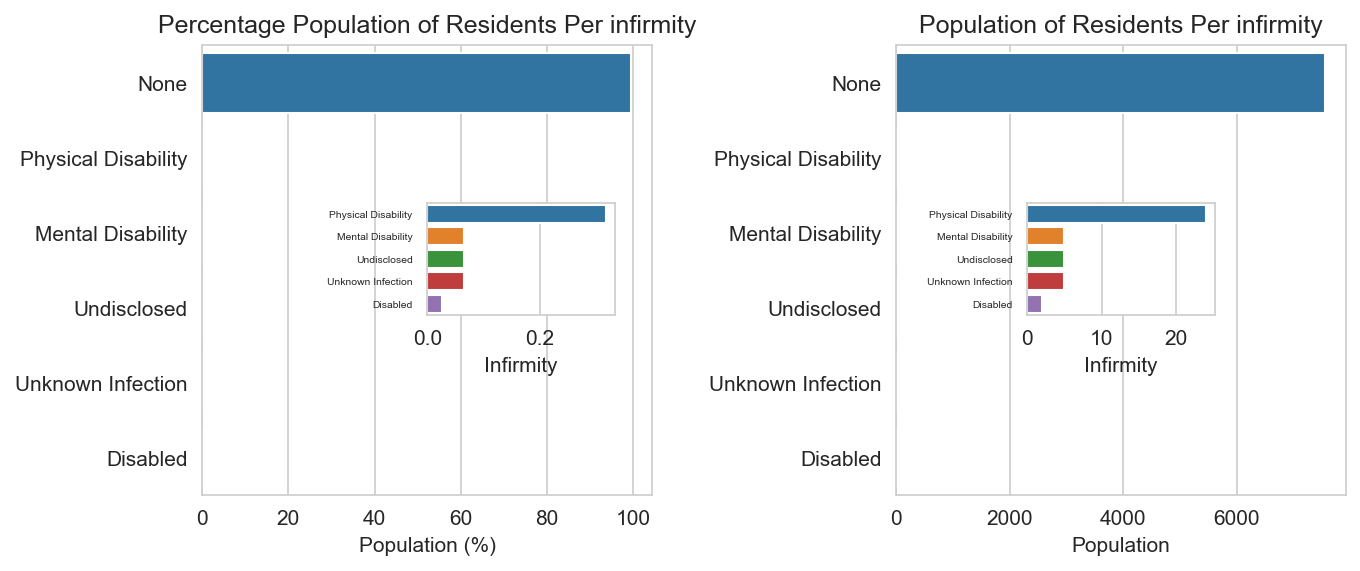

In [142]:
fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)
l, r = fig.add_axes([0, 0, 0.6, 1]), fig.add_axes([0.925, 0, 0.6, 1])
z, z2 = fig.add_axes([0.3, 0.4, 0.25, 0.25]), fig.add_axes([1.1, 0.4, 0.25, 0.25])

left = sns.barplot(y=infirmity_freq_perc.index, x=infirmity_freq_perc, order=infirmity_freq_perc.index, ax=l)
right = sns.barplot(y=infirmity_freq.index, x=infirmity_freq, 
                    order=infirmity_freq.index, ax=r)
perc_zoomed = sns.barplot(y=minority_freq_perc.index, x=minority_freq_perc, ax=z,
                     order=minority_freq_perc.index)
zoomed = sns.barplot(y=minority_freq.index, x=minority_freq, ax=z2,
                     order=minority_freq.index)

left.set_xlabel("Population (%)"), right.set_xlabel("Population")

perc_zoomed.set_yticklabels(minority_freq_perc.index, fontsize=5)
zoomed.set_yticklabels(minority_freq.index, fontsize=5)

left.set_title("Percentage Population of Residents Per infirmity")
right.set_title("Population of Residents Per infirmity")

sns.relational.plt.show()

From the plot above, we can see that over 99% of residents have no infirmity. And Physical Disability is the most prominent infirmity.

#### Replace the old "Infirmity" column in the original census_df dataframe with cleaned series, "infirmity".

In [143]:
census_df['Infirmity'] = infirmity

In [144]:
print(cd.unique_categs(census_df)['Infirmity'])

['None', 'Mental Disability', 'Physical Disability', 'Undisclosed', 'Disabled', 'Unknown Infection']


___

### Age

In [145]:
print(cd.null_checker(census_df)['Age'])

0


**NOTE:**<BR>
There are no nan values in the Age column

In [146]:
print(cd.check_for_empty_str(census_df)['Age'])

False


**NOTE:**<BR>
No blanks in the Age column, as well.

In [147]:
print(cd.unique_categs(census_df)['Age'])

['43', '44', '5', '25', '24', '3', '105', '73', '19', '10', '57', '30', '2', '88', '85', '52', '56', '28', '47', '20', '75', '59', '42', '61', '67', '66', '76', '77', '50', '26', '27', '55', '53', '29', '11', '22', '64', '68', '38', '34', '32', '37', '13', '69', '81', '60', '72', '31', '54', '83', '41', '39', '33', '4', '48', '62', '70', '46', '16', '84', '65', '15', '21', '40', '14', '12', '23', '74', '7', '51', '92', '6', '45', '63', '18', '36', '55.55', '17', '9', '71', 'Four', '49', '0', '80', '89', '91', '35', '1.75', 'One', '58', '8', '1', '82', '79', '98', '100', '78', '94', '104', '96', '86', '87', '58.5088688', '0.5', '103', '93', '119', '90', '106', '55.52492408', '56.52492408', '131', '107', '55.27579403', '57.27579403', '99', '97', '-1', '95', '55.63583519', '59.22686093']


**NOTE:**<br>
The current state of Age column is unacceptable. Ideally, ages should be integers. But here, we can see values in different formats such as spelling of numbers, decimal figures in string, and integers in string.<br><br>

In [148]:
# create a copy of age series to avoid making
# unwanted changes to the main dataframe
age = copy.deepcopy(census_df['Age'])

Before we can change the datatype of age to int, we must first make sure that all of its values are convertible to integers

#### Change all spellings to numbers

In [149]:
converter = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
age = cd.transform_val(age, converter)

In [150]:
print(age.unique())

['43' '44' '5' '25' '24' '3' '105' '73' '19' '10' '57' '30' '2' '88' '85'
 '52' '56' '28' '47' '20' '75' '59' '42' '61' '67' '66' '76' '77' '50'
 '26' '27' '55' '53' '29' '11' '22' '64' '68' '38' '34' '32' '37' '13'
 '69' '81' '60' '72' '31' '54' '83' '41' '39' '33' '4' '48' '62' '70' '46'
 '16' '84' '65' '15' '21' '40' '14' '12' '23' '74' '7' '51' '92' '6' '45'
 '63' '18' '36' '55.55' '17' '9' '71' '49' '0' '80' '89' '91' '35' '1.75'
 '1' '58' '8' '82' '79' '98' '100' '78' '94' '104' '96' '86' '87'
 '58.5088688' '0.5' '103' '93' '119' '90' '106' '55.52492408'
 '56.52492408' '131' '107' '55.27579403' '57.27579403' '99' '97' '-1' '95'
 '55.63583519' '59.22686093']


#### Round up all decimals to nearest integers

In [151]:
age = age.apply(cd.round_up_num)

In [152]:
print(age.unique())

['43' '44' '5' '25' '24' '3' '105' '73' '19' '10' '57' '30' '2' '88' '85'
 '52' '56' '28' '47' '20' '75' '59' '42' '61' '67' '66' '76' '77' '50'
 '26' '27' '55' '53' '29' '11' '22' '64' '68' '38' '34' '32' '37' '13'
 '69' '81' '60' '72' '31' '54' '83' '41' '39' '33' '4' '48' '62' '70' '46'
 '16' '84' '65' '15' '21' '40' '14' '12' '23' '74' '7' '51' '92' '6' '45'
 '63' '18' '36' '17' '9' '71' '49' '0' '80' '89' '91' '35' '1' '58' '8'
 '82' '79' '98' '100' '78' '94' '104' '96' '86' '87' '103' '93' '119' '90'
 '106' '131' '107' '99' '97' '-1' '95']


After changing spellings to numbers and rounding up all decimals, the values now appear ready to be converted into type int.<br><br>

#### Cast the age series to type int

In [153]:
age = sns.categorical.pd.to_numeric(age)

In [154]:
print(age.dtypes)

int64


In [155]:
print(age.unique())

[ 43  44   5  25  24   3 105  73  19  10  57  30   2  88  85  52  56  28
  47  20  75  59  42  61  67  66  76  77  50  26  27  55  53  29  11  22
  64  68  38  34  32  37  13  69  81  60  72  31  54  83  41  39  33   4
  48  62  70  46  16  84  65  15  21  40  14  12  23  74   7  51  92   6
  45  63  18  36  17   9  71  49   0  80  89  91  35   1  58   8  82  79
  98 100  78  94 104  96  86  87 103  93 119  90 106 131 107  99  97  -1
  95]


**Fix error of -1 years old**

In [156]:
# Take a look at those having an age of -1
neg_age = census_df.loc[age.loc[age == -1].index]
neg_age

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
6432,30,St.Matthew Avenue,Matthew,Wilson-Hughes,-1,Son,NaN,M,Child,None,NaN,"30, St.Matthew Avenue",0,0,0


Now we know that Matthew Wilson-Hughes is a boy who resides at 30, St. Matthew Avenue.

In [157]:
# look at members of his household
census_df.loc[census_df['Address'] == neg_age['Address'].values[0]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
6429,30,St.Matthew Avenue,Marilyn,Hughes,21,Head,Married,F,University Student,None,None,"30, St.Matthew Avenue",0,0,1
6430,30,St.Matthew Avenue,Samuel,Hughes,26,Husband,Married,M,Agricultural engineer,None,None,"30, St.Matthew Avenue",0,0,0
6431,30,St.Matthew Avenue,Charlene,Wilson-Hughes,2,Daughter,NaN,F,Child,None,NaN,"30, St.Matthew Avenue",0,0,0
6432,30,St.Matthew Avenue,Matthew,Wilson-Hughes,-1,Son,NaN,M,Child,None,NaN,"30, St.Matthew Avenue",0,0,0
6433,30,St.Matthew Avenue,Declan,Wallis,63,Lodger,Divorced,M,Research scientist (medical),None,Catholic,"30, St.Matthew Avenue",0,0,0
6434,30,St.Matthew Avenue,Jordan,Dawson,32,Lodger,Single,M,Exercise physiologist,None,Muslim,"30, St.Matthew Avenue",0,0,0


NOTE:<br>
There are 6 occupants residing at 30, St. Matthew Avenue. However, looking at their surnames gives it away. <br>
The Hughes household consists of 4 occupants, with the parents (Husband & Wife) being in their twenties. <br>It is important to note that the wife's age is 21, which means the youngest she could have gotten married is at age 18 (3 years prior). <br>
Hence, it seems reasonable to assume that Charlene Wilson-Hughes is their oldest child and Matthew Wilson-Hughes would be the younger child.<br>
***Therefore, it is likely that -1 was mistakenly written instead of age 1.<br>
Hence, I shall now proceed to correct this mistake by changing Matthew Wilson-Hughes' age from -1 to 1***<br><br>

In [158]:
age.loc[neg_age.index] = 1

In [159]:
print(age.unique())

[ 43  44   5  25  24   3 105  73  19  10  57  30   2  88  85  52  56  28
  47  20  75  59  42  61  67  66  76  77  50  26  27  55  53  29  11  22
  64  68  38  34  32  37  13  69  81  60  72  31  54  83  41  39  33   4
  48  62  70  46  16  84  65  15  21  40  14  12  23  74   7  51  92   6
  45  63  18  36  17   9  71  49   0  80  89  91  35   1  58   8  82  79
  98 100  78  94 104  96  86  87 103  93 119  90 106 131 107  99  97  95]


#### Fix error of being older than 122 years old

Take a look at those older than the oldest person ever - 122 years

In [160]:
older_than_oldest = census_df.loc[age.loc[age > 122].index]
older_than_oldest

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
3990,8,Cancerpath Drive,Josephine,Holmes,131,Head,Married,F,Retired Clinical psychologist,None,Christian,"8, Cancerpath Drive",1,0,0


In [161]:
# Take a look at Josephine Holmes' household
census_df.loc[census_df['Address'] == older_than_oldest['Address'].values[0]]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
3990,8,Cancerpath Drive,Josephine,Holmes,131,Head,Married,F,Retired Clinical psychologist,None,Christian,"8, Cancerpath Drive",1,0,0
3991,8,Cancerpath Drive,Stewart,Holmes,107,Husband,Married,M,Retired Rural practice surveyor,None,Christian,"8, Cancerpath Drive",1,0,0


**NOTE:**<br>
Knowing that Josephine is married to Stewart Holmes, who is 107 years old and still living, it is reasonable to expect that her own age shouldn't be very far from that of her husband's.<br>
This error could be because she can no longer correctly recall her age - due to old age.<br>
However, in marriages, it is quite common to see an older husband/younger wife combination.<br>
Therefore, I shall assign Josephine Holmes an age that is 5 years below that of Stewart Holmes.

In [162]:
# make Josephine Holmes 5 years younger than Stewart Holmes (her husband)
age.loc[older_than_oldest.index] = age.loc[census_df.loc[(census_df['Surname'] == 'Holmes') &
                                                         (census_df['First Name'] == 'Stewart')].index].apply(lambda val: int(val) - 5).values[0]

In [163]:
age.loc[older_than_oldest.index]

3990    102
Name: Age, dtype: int64

In [164]:
print(age.unique())

[ 43  44   5  25  24   3 105  73  19  10  57  30   2  88  85  52  56  28
  47  20  75  59  42  61  67  66  76  77  50  26  27  55  53  29  11  22
  64  68  38  34  32  37  13  69  81  60  72  31  54  83  41  39  33   4
  48  62  70  46  16  84  65  15  21  40  14  12  23  74   7  51  92   6
  45  63  18  36  17   9  71  49   0  80  89  91  35   1  58   8  82  79
  98 100  78  94 104  96  86  87 103  93 119  90 106 102 107  99  97  95]


#### Replace the old "Age" column in the original census_df dataframe with cleaned series, "age".

In [165]:
census_df['Age'] = age

In [166]:
census_df['Age'].dtypes

dtype('int64')

___

In [167]:
retired_ages = census_df.loc[census_df['Is Retired'] == 1, 'Age']

In [168]:
retired_age_freq = retired_ages.value_counts().sort_index()
retired_age_freq

68     52
69     45
70     53
71     42
72     52
73     54
74     43
75     42
76     33
77     37
78     29
79     26
80     28
81     24
82     27
83     33
84     34
85     18
86     16
87      9
88     16
89     14
90      6
91      4
92      4
93      5
94      4
95      1
96      2
97      2
98      2
99      1
100     1
102     1
103     1
104     2
105     1
106     1
107     1
119     2
Name: Age, dtype: int64

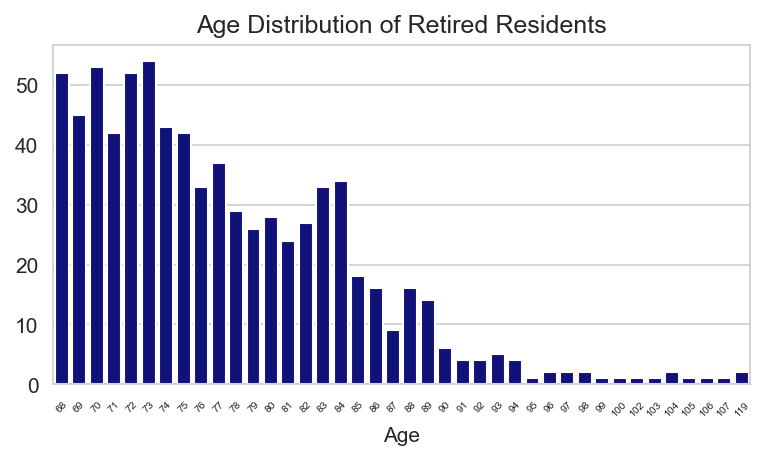

In [169]:
sns.set_style(style='whitegrid')
retired_age_freq_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=150)
retired_plotted = sns.barplot(x=retired_age_freq.index, y=retired_age_freq, color='darkblue')
retired_plotted.set_xticklabels(labels=retired_age_freq.index, fontsize=5, rotation=45)
retired_plotted.set_ylabel(None), retired_plotted.set_xlabel('Age')
retired_plotted.set_title("Age Distribution of Retired Residents");

In [170]:
fname='age_distrib_of_retired.png'
cd.fig_writer(fname, retired_age_freq_fig)

'age_distrib_of_retired.png'

___

In [171]:
age_binned = sns.categorical.pd.cut(age, [0, 18, 25, 40, 68, 122])
age_binned

0       (40, 68]
1       (40, 68]
2        (0, 18]
3        (0, 18]
4       (18, 25]
          ...   
7576    (25, 40]
7577     (0, 18]
7578     (0, 18]
7579     (0, 18]
7580     (0, 18]
Name: Age, Length: 7581, dtype: category
Categories (5, interval[int64, right]): [(0, 18] < (18, 25] < (25, 40] < (40, 68] < (68, 122]]

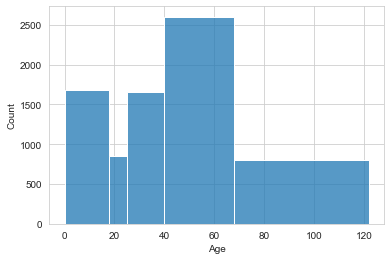

In [172]:
hplot = sns.histplot(data=census_df, x='Age', bins=[0, 18, 25, 40, 68, 122])
# hplot.get_
sns.categorical.plt.show()

___

In [173]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   int64 
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 5904 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
 12  Is Retired                     7581 non-null   int64 
 13  Is 

In [174]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,None,"1, Simmons Meadow",0,0,0
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,None,"1, Simmons Meadow",0,0,0
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN,"1, Simmons Meadow",0,0,1
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,M,Student,None,NaN,"1, Simmons Meadow",0,0,1
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,None,"1, Simmons Meadow",0,0,0


#### Save dataframe changes to filesystem as csv file

In [175]:
fname = "Infirmity_and_Age_cleaned.csv"
census_df.to_csv(fname, index=False)

___

### Marital Status

In [176]:
print(cd.check_for_empty_str(census_df)['Marital Status'])

True


**NOTE:**<br>
There are blanks in the Marital Status column

In [177]:
print(cd.null_checker(census_df)['Marital Status'])

1677


**NOTE:**<br>
There are 1667 nan values in the Marital Status column

In [178]:
print(cd.unique_categs(census_df)['Marital Status'])

['Married', nan, 'Divorced', 'Widowed', 'Single', 'Di-vorced', ' ']


#### Fix inconsistency of the 'divorced' value

In [179]:
mar_stat = copy.deepcopy(census_df['Marital Status'])

In [180]:
converter = {'Di-vorced': 'Divorced'}
mar_stat = cd.transform_val(mar_stat, converter)

In [181]:
print(mar_stat.unique())

['Married' nan 'Divorced' 'Widowed' 'Single' ' ']


#### Take a look at those with nan marital_status

In [182]:
null_mar_stat = census_df.loc[mar_stat.loc[mar_stat.isnull()].index]
null_mar_stat

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,NaN,F,Student,None,NaN,"1, Simmons Meadow",0,0,1
3,1,Simmons Meadow,Henry,Bradley,5,Son,NaN,M,Student,None,NaN,"1, Simmons Meadow",0,0,1
6,2,Simmons Meadow,Lucy,O'Brien,3,Daughter,NaN,F,Child,None,NaN,"2, Simmons Meadow",0,0,0
10,4,Simmons Meadow,Pamela,Sutton,10,Granddaughter,NaN,F,Student,None,NaN,"4, Simmons Meadow",0,0,1
11,4,Simmons Meadow,Justin,Sutton,10,Grandson,NaN,M,Student,None,NaN,"4, Simmons Meadow",0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7575,1,Memorial Farmhouse,Lynne,Page,15,Daughter,NaN,F,Student,None,NaN,"1, Memorial Farmhouse",0,0,1
7577,1,Newry Spire,Jason,Taylor,17,Son,NaN,M,Student,None,NaN,"1, Newry Spire",0,0,1
7578,1,Newry Spire,Oliver,Taylor,13,Son,NaN,M,Student,None,NaN,"1, Newry Spire",0,0,1
7579,1,Newry Spire,Carly,Taylor,10,Daughter,NaN,F,Student,None,NaN,"1, Newry Spire",0,0,1


#### Visualize the age distribution of those having nan marital status

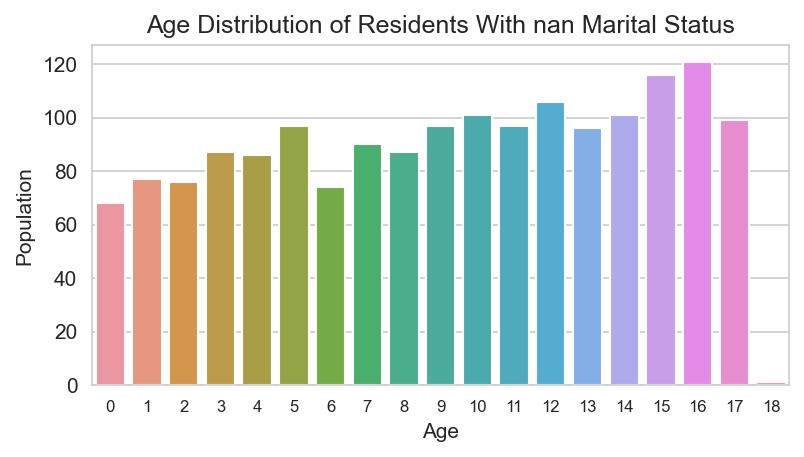

In [183]:
mar_stat_freq = null_mar_stat['Age'].value_counts().sort_index()

sns.categorical.plt.figure(figsize=(6, 3), dpi=150)
plotter = sns.barplot(x=mar_stat_freq.index, y=mar_stat_freq)

plotter.set_xticklabels(mar_stat_freq.index, fontsize=8)
plotter.set_ylabel("Population"), plotter.set_xlabel('Age')

plotter.set_title("Age Distribution of Residents With nan Marital Status")

sns.categorical.plt.show()

In [184]:
# occupation distribution of those having nan marital status
null_mar_stat['Occupation'].unique()

array(['Student', 'Child'], dtype=object)

We can see from the Age and Occupation columns of those having nan marital status that all (except one 18 year old) are minors (below 18).<br>
***Since they are not eligible for marriage, I shall replace nan with "Ineligible".***

In [185]:
mar_stat.loc[null_mar_stat.index] = "Ineligible"

In [186]:
# Take a look at the only non-minor with a nan marital status
null_mar_stat.loc[null_mar_stat['Age'] >= 18]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
3696,50,Smith Manors,Kevin,Jones-Lewis,18,Grandson,NaN,M,Student,None,NaN,"50, Smith Manors",0,0,1


In [187]:
# Now let's check out his living situation
census_df.loc[census_df['Address'] == null_mar_stat.loc[3696, 'Address']]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
3693,50,Smith Manors,Simon,Lewis,67,Head,Married,M,Automotive engineer,None,Christian,"50, Smith Manors",0,0,0
3694,50,Smith Manors,Paula,Lewis,65,Wife,Married,F,"Geologist, engineering",None,Christian,"50, Smith Manors",0,0,0
3695,50,Smith Manors,Aaron,Lewis,19,Grandson,Single,M,University Student,None,Christian,"50, Smith Manors",0,0,1
3696,50,Smith Manors,Kevin,Jones-Lewis,18,Grandson,NaN,M,Student,None,NaN,"50, Smith Manors",0,0,1
3697,50,Smith Manors,Harry,Williams,14,Grandson,NaN,M,Student,None,NaN,"50, Smith Manors",0,0,1


**NOTE:**<br>
Seeing that Kevin Jones-Lewis is living with his grand-parents eventhough he's 18, it is reasonable to assume that he is single.<br>
Therefore, I shall assign to him a marital status of single<br><br>

In [188]:
mar_stat.loc[3696] = 'Single'

In [189]:
cd.null_checker(mar_stat)

0

No more nan values in the marital status series

#### Take a look at those with blank marital status

In [190]:
blank_mar_stat = census_df.loc[mar_stat.loc[mar_stat == ' '].index]
blank_mar_stat

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
2397,18,Green Wall,Justin,Rice,13,Grandson,,M,Student,None,NaN,"18, Green Wall",0,0,1


We can see that Justin Rice is only a 13 year-old boy, and his marital status is therefore automatically 'Ineligible'.

In [191]:
# assign Justin Rice a single marital status
mar_stat.loc[mar_stat == ' '] = "Ineligible"

In [192]:
print(mar_stat.unique())

['Married' 'Ineligible' 'Divorced' 'Widowed' 'Single']


#### Age Distribution of married residents

In [193]:
married_ages = census_df.loc[mar_stat.loc[mar_stat == 'Married'].index, ['Age']]
married_ages

,Age
0,43
1,44
16,88
17,85
29,59
...,...
7563,43
7567,42
7568,45
7571,40


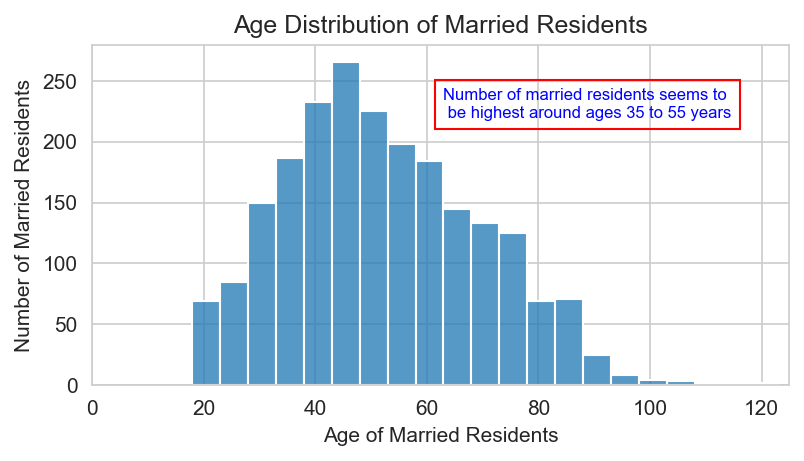

In [194]:
married_age_distr_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=150)
ax1 = sns.histplot(data=married_ages, x='Age', binwidth=5)

ax1.set_xlim(0, 125)

ax1.set_xlabel("Age of Married Residents")
ax1.set_ylabel("Number of Married Residents")

ax1.set_title("Age Distribution of Married Residents")

note = "Number of married residents seems to\n be highest around ages 35 to 55 years"
ax1.text(63, 220, note, size=8, color='blue',
        bbox={'facecolor':'none', 'edgecolor':'red'});

In [195]:
# save figure to filesystem as png file
fname = 'married_age_distr.png'
married_age_distr_fig.savefig(fname, dpi=200, format='png', pad_inches=0.5, orientation='landscape')

#### Assumption: 
Normally, the relationship to head of house of most married people should be any of these `[Head, Wife, Husband, Son-in-law]`<br>
So anyone who claims to be married but has a relationship to the head of house outside of those listed above should be looked into.

In [196]:
# Take a look at the 7 residents already married at age 18
investigate_marital_status = census_df.loc[(census_df.index.isin(mar_stat.loc[mar_stat == 'Married'].index)) & 
                                           ~(census_df['Relationship to Head of House'].isin(['Head', 'Wife', 
                                                                                             'Husband', 'Son-in-law']))]
investigate_marital_status

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
1279,19,Runnymede Harbors,Marilyn,Roberts,53,Daughter,Married,F,"Engineer, technical sales",None,None,"19, Runnymede Harbors",0,0,0
2323,51,Wright Brook,Molly,Wright,21,None,Married,F,University Student,None,None,"51, Wright Brook",0,0,1
2324,51,Wright Brook,Lawrence,Wright,27,None,Married,M,Chief Marketing Officer,None,None,"51, Wright Brook",0,0,0
2352,1,Green Wall,Francesca,Smith,45,Daughter,Married,F,Agricultural engineer,None,None,"1, Green Wall",0,0,0
3514,31,Clayton Brooks,Marilyn,Jackson,30,None,Married,F,Unemployed,None,None,"31, Clayton Brooks",0,1,0
3515,31,Clayton Brooks,Ronald,Jackson,35,None,Married,M,Unemployed,None,None,"31, Clayton Brooks",0,1,0
3609,17,Smith Manors,Nicole,Powell,40,None,Married,F,Bonds trader,None,Christian,"17, Smith Manors",0,0,0
3610,17,Smith Manors,Eric,Powell,43,None,Married,M,"Scientist, physiological",None,Christian,"17, Smith Manors",0,0,0
4521,1,Shrine Drive,Stacey,Lawrence,37,None,Married,F,Estate manager/land agent,None,Christian,"1, Shrine Drive",0,0,0
4522,1,Shrine Drive,Matthew,Lawrence,43,None,Married,M,"Surveyor, building",None,None,"1, Shrine Drive",0,0,0


Looking at the table, it can be seen that all of those with a None Relationship to Head of House have their spouses to confirm their marital status.<br>
This leaves us with two residents (indexes 1279 and 2352) that require further investigation because they appear to be living with their parents despite their marital status.<br>

#### Looking at their living situation

In [197]:
# for Marilyn Roberts (1279) and Francesca Smith (2352):
census_df.loc[census_df['Address'].isin(census_df.loc[[1279, 2352], 'Address'].to_list())]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
1277,19,Runnymede Harbors,Patricia,Roberts,75,Head,Married,F,Retired Adult guidance worker,None,Christian,"19, Runnymede Harbors",1,0,0
1278,19,Runnymede Harbors,Derek,Roberts,78,Husband,Married,M,Retired Trade union research officer,None,Christian,"19, Runnymede Harbors",1,0,0
1279,19,Runnymede Harbors,Marilyn,Roberts,53,Daughter,Married,F,"Engineer, technical sales",None,None,"19, Runnymede Harbors",0,0,0
1280,19,Runnymede Harbors,William,Roberts,56,Son-in-law,Married,M,Surgeon,None,None,"19, Runnymede Harbors",0,0,0
2350,1,Green Wall,Abbie,Smith,67,Head,Married,F,"Teacher, special educational needs",None,None,"1, Green Wall",0,0,0
2351,1,Green Wall,Jeffrey,Smith,65,Husband,Married,M,Dramatherapist,None,None,"1, Green Wall",0,0,0
2352,1,Green Wall,Francesca,Smith,45,Daughter,Married,F,Agricultural engineer,None,None,"1, Green Wall",0,0,0
2353,1,Green Wall,Kenneth,Smith,43,Son-in-law,Married,M,Health promotion specialist,None,None,"1, Green Wall",0,0,0


We can confirm that both wives are living in their parents house with their husbands. So, their marital status is no longer in doubt.<br><br>

#### Age Distribution of divorced residents

In [198]:
divorced_ages = census_df.loc[mar_stat.loc[mar_stat == 'Divorced'].index, ['Age']]
divorced_ages

,Age
4,25
5,24
13,57
14,30
23,25
...,...
7535,19
7542,54
7548,30
7549,29


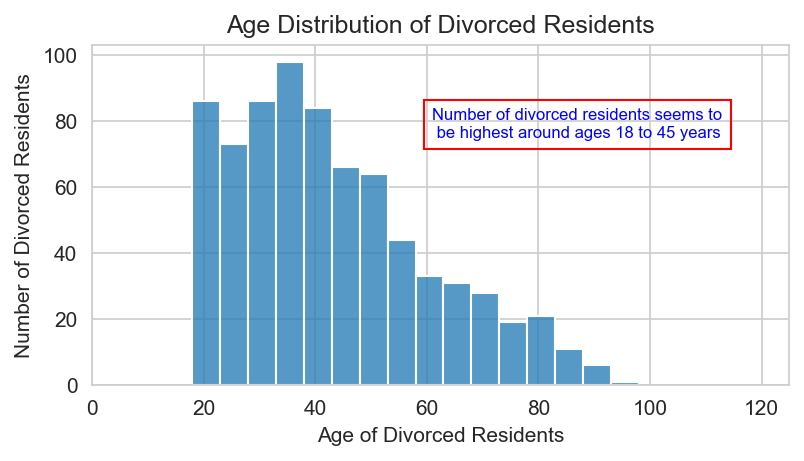

In [199]:
divorced_age_distr_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=150)
ax1 = sns.histplot(data=divorced_ages, x='Age', binwidth=5)

ax1.set_xlim(0, 125)

ax1.set_xlabel("Age of Divorced Residents")
ax1.set_ylabel("Number of Divorced Residents")

ax1.set_title("Age Distribution of Divorced Residents")

note = "Number of divorced residents seems to\n be highest around ages 18 to 45 years"
ax1.text(61, 75, note, size=8, color='blue',
        bbox={'facecolor':'none', 'edgecolor':'red'});

In [200]:
# save figure to filesystem as png file
fname = 'divorced_age_distr.png'
divorced_age_distr_fig.savefig(fname, dpi=200, format='png', pad_inches=0.5, orientation='landscape')

#### Replace the old "Marital Status" column in the original census_df dataframe with cleaned series, "mar_stat".

In [201]:
census_df['Marital Status'] = mar_stat

#### Visualize the marital status distribution across the population

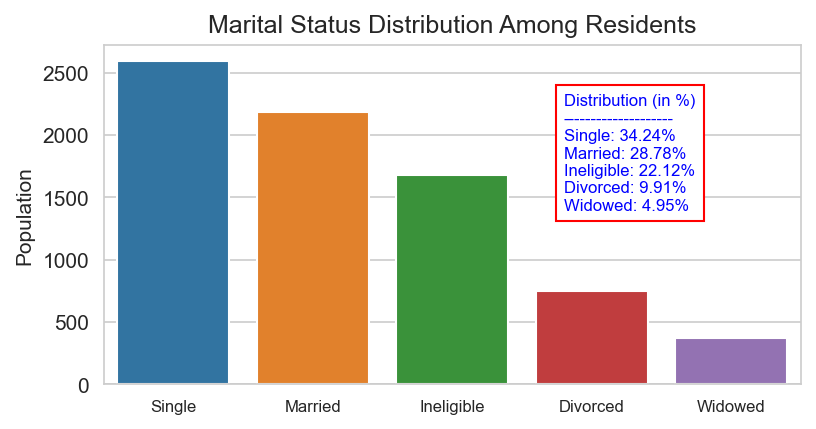

In [202]:
mar_stat_freq = census_df['Marital Status'].value_counts()
perc = sns.categorical.np.round(100 * mar_stat_freq/mar_stat.shape[0], 2)

marital_stat_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=150)
plotter = sns.barplot(x=mar_stat_freq.index, y=mar_stat_freq)

plotter.set_xticklabels(mar_stat_freq.index, fontsize=8)
plotter.set_ylabel("Population"), plotter.set_xlabel(None)

plotter.set_title("Marital Status Distribution Among Residents")

plotter.text(2.8, 1400, "Distribution (in %)\n" +
            "-"*20 + "\n" +
            f"Single: {perc.loc['Single']}%\n" +
            f"Married: {perc.loc['Married']}%\n" +
            f"Ineligible: {perc.loc['Ineligible']}%\n" +
            f"Divorced: {perc.loc['Divorced']}%\n" +
            f"Widowed: {perc.loc['Widowed']}%",
            fontsize=8, color='blue',
             bbox={'edgecolor': 'red', 'facecolor': 'white'})

sns.categorical.plt.show()

In [203]:
# save figure to filesystem as png file
fname = 'marital_status_distribution_of_residents.png'
marital_stat_fig.savefig(fname, dpi=200, format='png', pad_inches=0.5, orientation='landscape')

___

### Religion

In [204]:
print(cd.null_checker(census_df)['Religion'])

1717


In [205]:
print(cd.check_for_empty_str(census_df)['Religion'])

True


In [206]:
print(cd.unique_categs(census_df)['Religion'])

['None', nan, 'Christian', 'Catholic', 'Muslim', 'Methodist', 'Jewish', 'Jedi', 'Sikh', 'Bahai', 'Agnostic', 'Undecided', ' ', 'Baptist', 'Private']


In [207]:
religion = copy.deepcopy(census_df['Religion'])

#### Fix religion of minors

**NOTE:**<br>
Firstly, make sure all minors (below 18 years old) do not have a religion by assigning their religion to be 'Ineligible'.

In [208]:
religion.loc[census_df.loc[census_df['Age'] < 18].index] = 'Ineligible'

#### Fix blank religion

In [209]:
blank_religion = census_df.loc[religion.loc[(religion == ' ') |
                                            (religion == '')].index]
blank_religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
2432,31,Green Wall,Allan,Roberts,75,Head,Single,M,Retired Insurance account manager,None,,"31, Green Wall",1,0,0
7000,28,Crown Stravenue,Molly,Edwards,40,Head,Married,F,Government social research officer,None,,"28, Crown Stravenue",0,0,0
7034,41,Crown Stravenue,Melissa,Hall,58,None,Single,F,Production engineer,None,,"41, Crown Stravenue",0,0,0


**Fix blank religion**

In this situation, a blank/empty string in the Religion column simply means we DO NOT KNOW the religion of that individual.<br>
Therefore, I shall be using **'Unknown'** as a placeholder for blanks/empty strings.
<br><br>

In [210]:
religion.loc[blank_religion.index] = 'Unknown'

#### Fix nan Religion

In [211]:
null_religion = census_df.loc[religion.isnull()]
null_religion

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student
131,1,Wharf Place,George,Lane,18,None,Widowed,M,Student,None,NaN,"1, Wharf Place",0,0,1
227,37,Wharf Place,Michelle,Jackson,18,Head,Single,F,Student,None,NaN,"37, Wharf Place",0,0,1
455,8,Griffiths Inlet,Clive,Fisher,18,Head,Married,M,Student,None,NaN,"8, Griffiths Inlet",0,0,1
456,8,Griffiths Inlet,June,Fisher,19,Wife,Married,F,University Student,None,NaN,"8, Griffiths Inlet",0,0,1
473,17,Griffiths Inlet,Anthony,Wade,18,Head,Married,M,Student,None,NaN,"17, Griffiths Inlet",0,0,1
474,17,Griffiths Inlet,Sharon,Wade,20,Wife,Married,F,University Student,None,NaN,"17, Griffiths Inlet",0,0,1
970,47,Wharf Wells,Kerry,Wallace,18,Lodger,Divorced,F,Student,None,NaN,"47, Wharf Wells",0,0,1
1212,8,Guardian Road,Fiona,Ali,18,Lodger,Single,F,Student,None,NaN,"8, Guardian Road",0,0,1
1428,8,Coconutbelt Lane,Heather,Cook,18,Visitor,Single,F,Student,None,NaN,"8, Coconutbelt Lane",0,0,1
2043,33,Brooks Road,Philip,Robson,18,Head,Divorced,M,Student,None,NaN,"33, Brooks Road",0,0,1


In [212]:
# age distribution of those with nan religion
nan_religion_age_freq = null_religion['Age'].value_counts().sort_index()
nan_religion_age_freq_perc = sns.categorical.np.round(100 * null_religion['Age'].value_counts()/null_religion.shape[0], 2).sort_index()

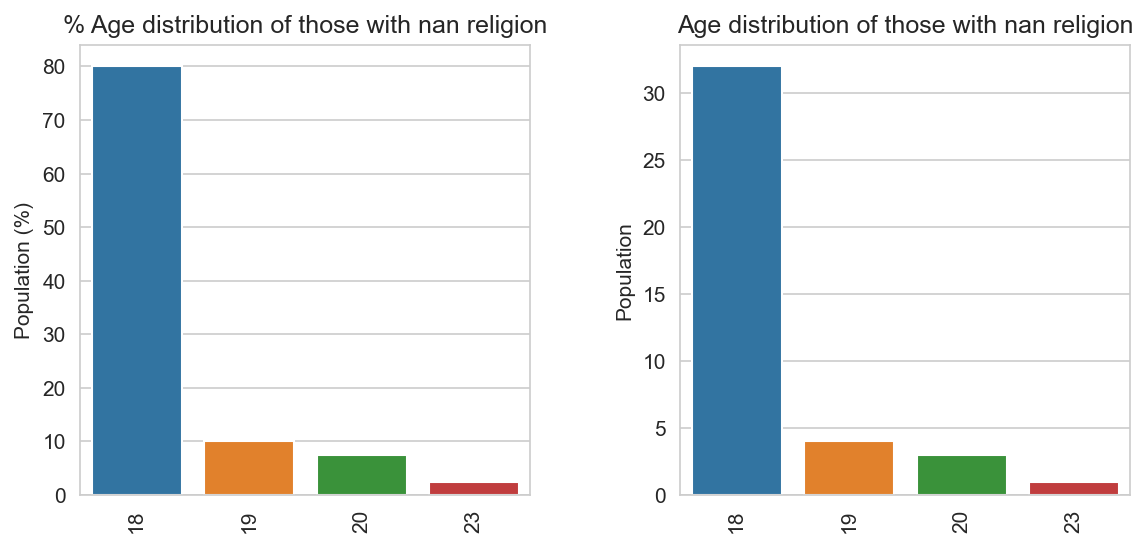

In [213]:
fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)
l, r = fig.add_axes([0, 0, 0.6, 1]), fig.add_axes([0.8, 0, 0.6, 1])
# z, z2 = fig.add_axes([0.3, 0.4, 0.25, 0.25]), fig.add_axes([1.1, 0.4, 0.25, 0.25])

left = sns.barplot(x=nan_religion_age_freq_perc.index, y=nan_religion_age_freq_perc, order=nan_religion_age_freq_perc.index, ax=l)
right = sns.barplot(x=nan_religion_age_freq.index, y=nan_religion_age_freq, 
                    order=nan_religion_age_freq.index, ax=r)
# perc_zoomed = sns.barplot(y=minority_freq_perc.index, x=minority_freq_perc, ax=z,
#                      order=minority_freq_perc.index)
# zoomed = sns.barplot(y=minority_freq.index, x=minority_freq, ax=z2,
#                      order=minority_freq.index)

left.set_ylabel("Population (%)"), right.set_ylabel("Population")

left.set_xticklabels(nan_religion_age_freq_perc.index, rotation=90)
# left.set_ylim(0, 0.6)
right.set_xticklabels(nan_religion_age_freq.index, rotation=90)
# right.set_ylim(0, 2000)
# perc_zoomed.set_yticklabels(minority_freq_perc.index, fontsize=5)
# perc_zoomed.set_xlim(0, 0.1)
# zoomed.set_yticklabels(minority_freq.index, fontsize=5)

left.set_title("% Age distribution of those with nan religion")
right.set_title("Age distribution of those with nan religion")
# perc_zoomed.set_title("Minority")
# zoomed.set_title("Minority")

sns.relational.plt.show()

We can see that majority of those with nan religion are between 18-20 years old.<br>
**Therefore, those with a nan religion shall now be assigned 'Unknown' category as we DO NOT KNOW their true religion**

In [214]:
religion.loc[null_religion.index] = 'Unknown'

In [215]:
print(religion.unique())

['None' 'Ineligible' 'Christian' 'Catholic' 'Muslim' 'Methodist' 'Unknown'
 'Jewish' 'Jedi' 'Sikh' 'Bahai' 'Agnostic' 'Undecided' 'Baptist' 'Private']


In [216]:
religion_freq = religion.value_counts()
religion_freq

None          2623
Christian     1713
Ineligible    1677
Catholic       794
Methodist      506
Muslim         127
Sikh            49
Unknown         43
Jewish          35
Agnostic         5
Bahai            3
Undecided        2
Baptist          2
Jedi             1
Private          1
Name: Religion, dtype: int64

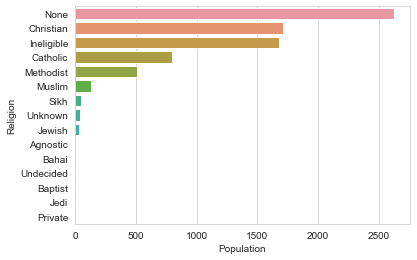

In [217]:
plotted = sns.barplot(y=religion_freq.index, x=religion_freq)
plotted.set_xlabel('Population'), plotted.set_ylabel("Religion");

Some of the values here are actually sub-divisions of other values. For instance,<br>
Catholic, Methodist, and Baptist are all known Christian denominations. Thus, these should be classified as Christians.<br>
Also values like Private, Undecided, Jedi, and None shall be classified as 'Unknown'.
Unique values should include: <br>
***Christian, Muslim, Sikh, Bahai, Agnostic, Jewish, NA, Unknown***<br><br>

In [218]:
converter = {'Catholic': 'Christian', 
             'Methodist': 'Christian', 
             'Baptist': 'Christian',
             'None': 'Unknown',
            'Private': 'Unknown', 
             'Jedi': 'Unknown',
            'Undecided': 'Unknown'}
religion = cd.transform_val(religion, converter)

In [219]:
religion.value_counts()

Christian     3015
Unknown       2670
Ineligible    1677
Muslim         127
Sikh            49
Jewish          35
Agnostic         5
Bahai            3
Name: Religion, dtype: int64

In [220]:
religion_freq = religion.value_counts()
rel_perc = sns.categorical.np.round(100 * religion_freq/religion.shape[0], 2)

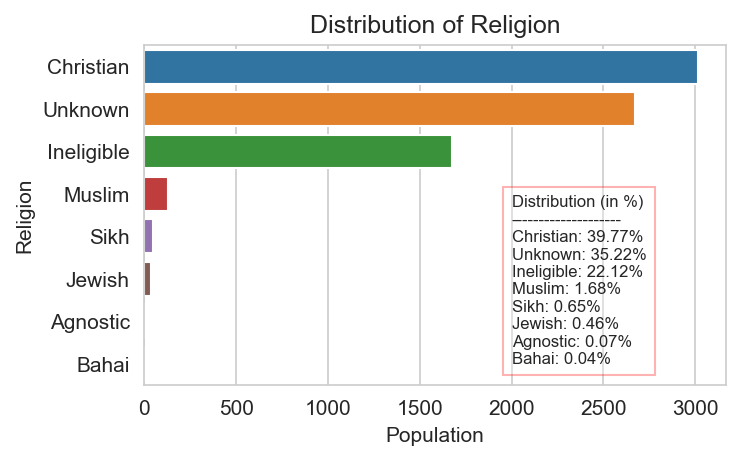

In [221]:
religion_distr_fig = sns.categorical.plt.figure(figsize=(5, 3), dpi=150)

plotted = sns.barplot(y=religion_freq.index, x=religion_freq)

plotted.set_xlabel('Population'), plotted.set_ylabel("Religion")

plotted.text(2000, 7, "Distribution (in %)\n" +
            "-"*20 + "\n" +
            f"Christian: {rel_perc.loc['Christian']:.2f}%\n" +
            f"Unknown: {rel_perc.loc['Unknown']}%\n" +
            f"Ineligible: {rel_perc.loc['Ineligible']}%\n" +
            f"Muslim: {rel_perc.loc['Muslim']}%\n" +
            f"Sikh: {rel_perc.loc['Sikh']}%\n" +
            f"Jewish: {rel_perc.loc['Jewish']}%\n" +
            f"Agnostic: {rel_perc.loc['Agnostic']}%\n" +
            f"Bahai: {rel_perc.loc['Bahai']}%",
            bbox={'facecolor':'w', 'edgecolor': 'red', 'alpha': 0.3},
            fontsize=8)

plotted.set_title("Distribution of Religion");

In [222]:
# save figure to filesystem
fname = 'religion_distribution_fig.png'
religion_distr_fig.savefig(fname, format='png', dpi=200, pad_inches=0.5, bbox_inches='tight')

In [223]:
print(religion.unique())

['Unknown' 'Ineligible' 'Christian' 'Muslim' 'Jewish' 'Sikh' 'Bahai'
 'Agnostic']


#### Create new featurn "Major Religions" column in the original census_df dataframe with cleaned series, "religion".

In [224]:
census_df['Major Religions'] = religion

In [225]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   int64 
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 7581 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
 12  Is Retired                     7581 non-null   int64 
 13  Is 

In [226]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student,Major Religions
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,None,"1, Simmons Meadow",0,0,0,Unknown
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,None,"1, Simmons Meadow",0,0,0,Unknown
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,Ineligible,F,Student,None,NaN,"1, Simmons Meadow",0,0,1,Ineligible
3,1,Simmons Meadow,Henry,Bradley,5,Son,Ineligible,M,Student,None,NaN,"1, Simmons Meadow",0,0,1,Ineligible
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,None,"1, Simmons Meadow",0,0,0,Unknown


In [227]:
census_df.corr()

,House Number,Age,Is Retired,Is Unemployed,Is Student
House Number,1.000000,0.057964,0.054592,-0.006484,-0.031086
Age,0.057964,1.000000,0.609902,0.098812,-0.602526
Is Retired,0.054592,0.609902,1.000000,-0.092516,-0.193281
Is Unemployed,-0.006484,0.098812,-0.092516,1.000000,-0.158629
Is Student,-0.031086,-0.602526,-0.193281,-0.158629,1.000000


___

#### Save dataframe changes to filesystem as csv file

In [228]:
fname = "final_Marital_Status_and_Religion_cleaned.csv"
census_df.to_csv(fname, index=False)

___

## EARLY OBSERVATIONS

In [229]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   7581 non-null   int64 
 1   Street                         7581 non-null   object
 2   First Name                     7581 non-null   object
 3   Surname                        7581 non-null   object
 4   Age                            7581 non-null   int64 
 5   Relationship to Head of House  7581 non-null   object
 6   Marital Status                 7581 non-null   object
 7   Gender                         7581 non-null   object
 8   Occupation                     7581 non-null   object
 9   Infirmity                      7581 non-null   object
 10  Religion                       5864 non-null   object
 11  Address                        7581 non-null   object
 12  Is Retired                     7581 non-null   int64 
 13  Is 

In [230]:
census_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
House Number,7581.0,26.807413,25.258199,1.0,8.0,20.0,37.0,150.0
Age,7581.0,37.210790,22.035577,0.0,19.0,36.0,53.0,119.0
Is Retired,7581.0,0.101306,0.301753,0.0,0.0,0.0,0.0,1.0
Is Unemployed,7581.0,0.070571,0.256124,0.0,0.0,0.0,0.0,1.0
Is Student,7581.0,0.248912,0.432411,0.0,0.0,0.0,0.0,1.0


In [231]:
census_df.select_dtypes(include='object').describe(include='all').transpose()

,count,unique,top,freq
Street,7581,105,Wharf Wells,314
First Name,7581,369,James,36
Surname,7581,623,Smith,204
Relationship to Head of House,7581,20,Head,2879
Marital Status,7581,5,Single,2596
Gender,7581,2,F,3946
Occupation,7581,1099,Student,1382
Infirmity,7581,6,None,7540
Religion,5864,14,None,2623
Address,7581,2878,"27, Brightwater Drive",22


In [232]:
census_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Address,Is Retired,Is Unemployed,Is Student,Major Religions
0,1,Simmons Meadow,Andrea,Bradley,43,Head,Married,F,Prison officer,None,None,"1, Simmons Meadow",0,0,0,Unknown
1,1,Simmons Meadow,Peter,Bradley,44,Husband,Married,M,Futures trader,None,None,"1, Simmons Meadow",0,0,0,Unknown
2,1,Simmons Meadow,Lauren,Bradley,5,Daughter,Ineligible,F,Student,None,NaN,"1, Simmons Meadow",0,0,1,Ineligible
3,1,Simmons Meadow,Henry,Bradley,5,Son,Ineligible,M,Student,None,NaN,"1, Simmons Meadow",0,0,1,Ineligible
4,1,Simmons Meadow,Edward,Slater,25,Lodger,Divorced,M,Further education lecturer,None,None,"1, Simmons Meadow",0,0,0,Unknown


___

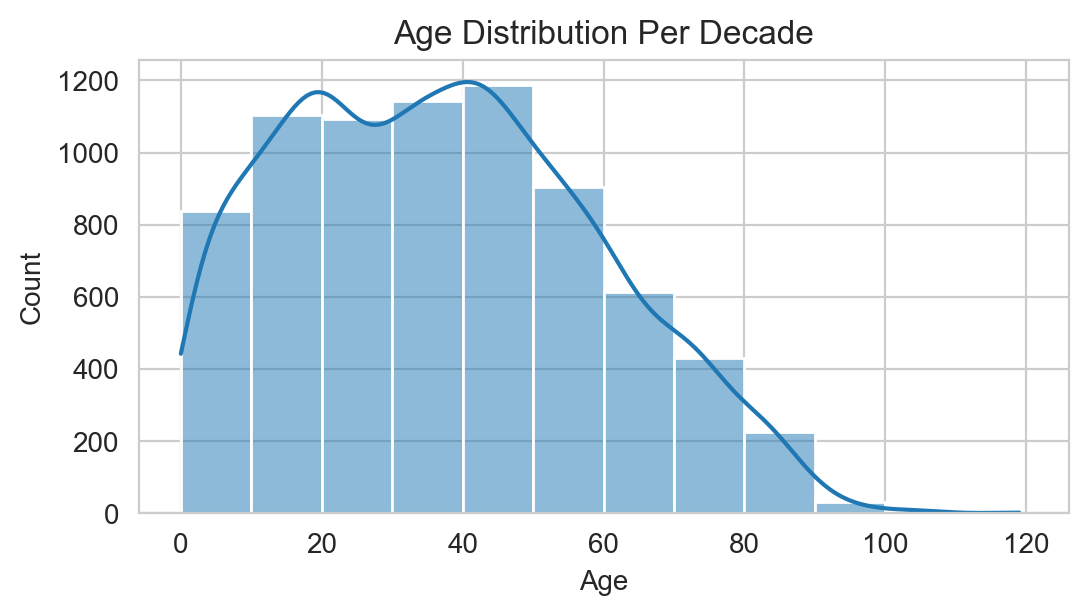

In [233]:
# Age distribution
sns.set_style(style='whitegrid')
age_distr_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)

pal = sns.dark_palette('brown', 2)

age_distr = sns.histplot(data=census_df, x='Age', binwidth=10, kde=True, palette=pal)
age_distr.set_title("Age Distribution Per Decade")

pal = sns.dark_palette('brown', 2)
sns.categorical.plt.show()

In [234]:
fname = "Age_distribution.png"
cd.fig_writer(fname, age_distr_fig)

'Age_distribution.png'

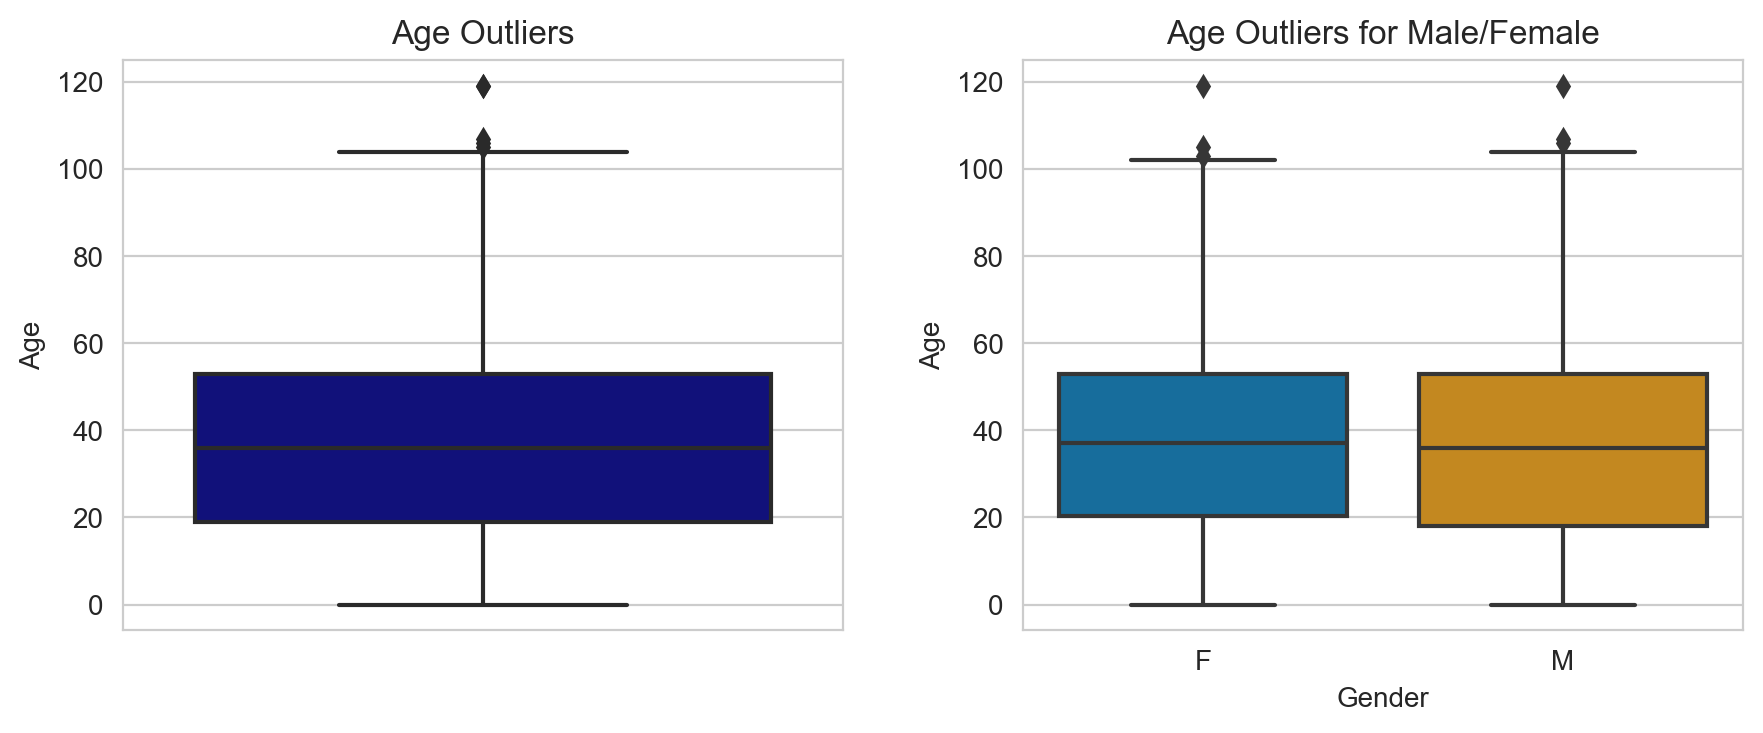

In [235]:
# Age distribution
sns.set_style(style='whitegrid')
age_distr_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
l, r = age_distr_fig.add_axes([0, 0, .6, .95]), age_distr_fig.add_axes([0.75, 0, .6, .95])

age_distr = sns.boxplot(data=census_df, y='Age', color='darkblue', ax=l)
hued_age_distr = sns.boxplot(data=census_df, y='Age', x='Gender', 
                             palette='colorblind', ax=r)

age_distr.set_title("Age Outliers"), hued_age_distr.set_title("Age Outliers for Male/Female")

sns.categorical.plt.show()

In [236]:
fname = "Hued_age_distribution.png"
cd.fig_writer(fname, age_distr_fig)

'Hued_age_distribution.png'

#### Average Age per Household

In [237]:
marital_average_age = census_df[['Marital Status', 'Age']].groupby(by=['Marital Status']).mean().astype(sns.relational.np.int64)
marital_average_age

,Age
Marital Status,
Divorced,42
Ineligible,9
Married,51
Single,37
Widowed,65


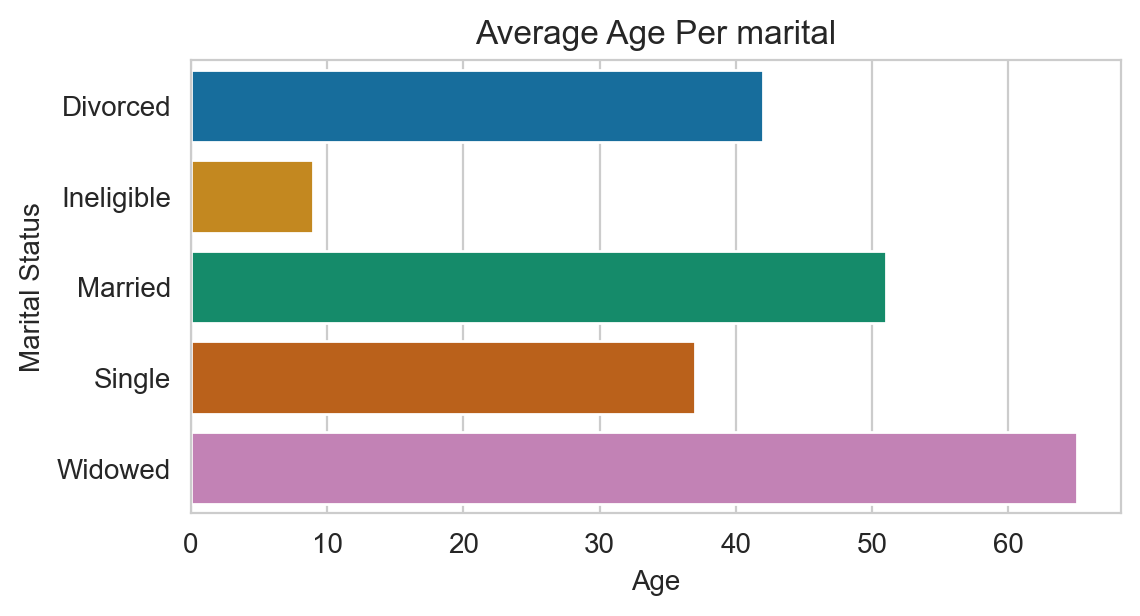

In [238]:
# distribution of age per marital
sns.set_style(style='whitegrid')

avg_marital_age_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
# l, r = avg_marital_age_fig.add_axes([0, 0, .6, .95]), avg_marital_age_fig.add_axes([0.75, 0, .6, .95])
pal = sns.dark_palette('brown', 2)

avg_marital_age = sns.barplot(y=marital_average_age.index, x=marital_average_age['Age'], palette='colorblind')
# avg_marital_age.set_ylabel('Population')

avg_marital_age.set_title("Average Age Per marital")

# freq.text(0.6, 3000, "Count\n" +
#           "-"*20 + "\n" +
#           f"Retired: {retired_distr.loc[1]}" + "\n" +
#          f"Not Retired: {retired_distr.loc[0]}")

sns.categorical.plt.show()

In [239]:
fname = "avg_age_per_marital.png"
cd.fig_writer(fname, avg_marital_age_fig)

'avg_age_per_marital.png'

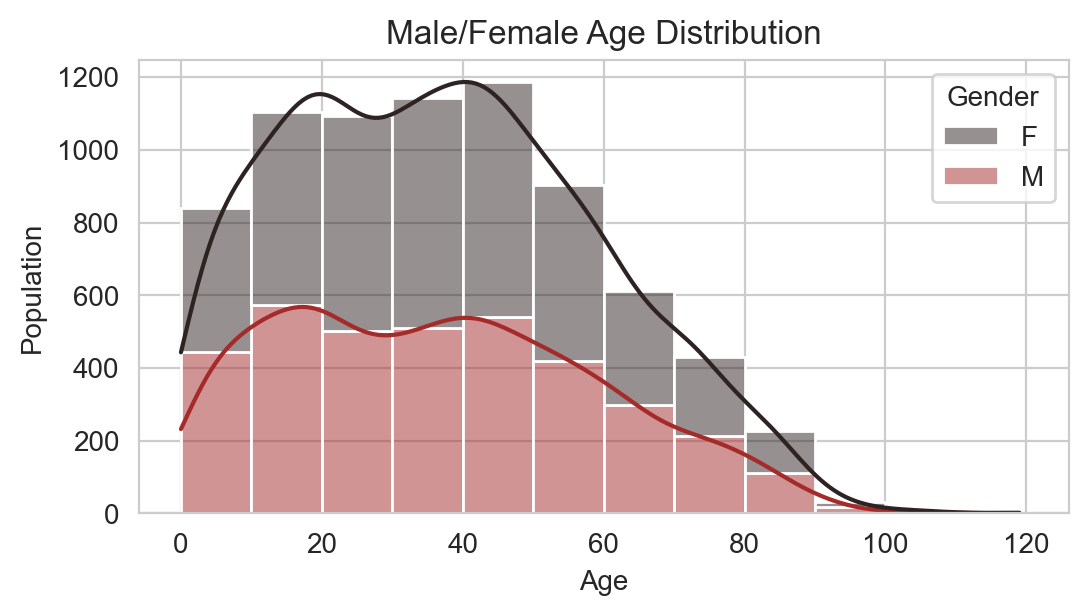

In [240]:
sns.set_style(style='whitegrid')

age_per_gender_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
# l, r = age_per_gender_fig.add_axes([0, 0, .6, .95]), age_per_gender_fig.add_axes([0.75, 0, .6, .95])
pal = sns.dark_palette('brown', 2)

age_per_gender = sns.histplot(data=census_df, x='Age', hue='Gender', binwidth=10,
                              kde=True, multiple='stack', palette=pal)
age_per_gender.set_ylabel('Population')

age_per_gender.set_title("Male/Female Age Distribution")

# freq.text(0.6, 3000, "Count\n" +
#           "-"*20 + "\n" +
#           f"Retired: {retired_distr.loc[1]}" + "\n" +
#          f"Not Retired: {retired_distr.loc[0]}")

sns.categorical.plt.show()

In [241]:
fname = "Age_per_gender.png"
cd.fig_writer(fname, age_per_gender_fig)

'Age_per_gender.png'

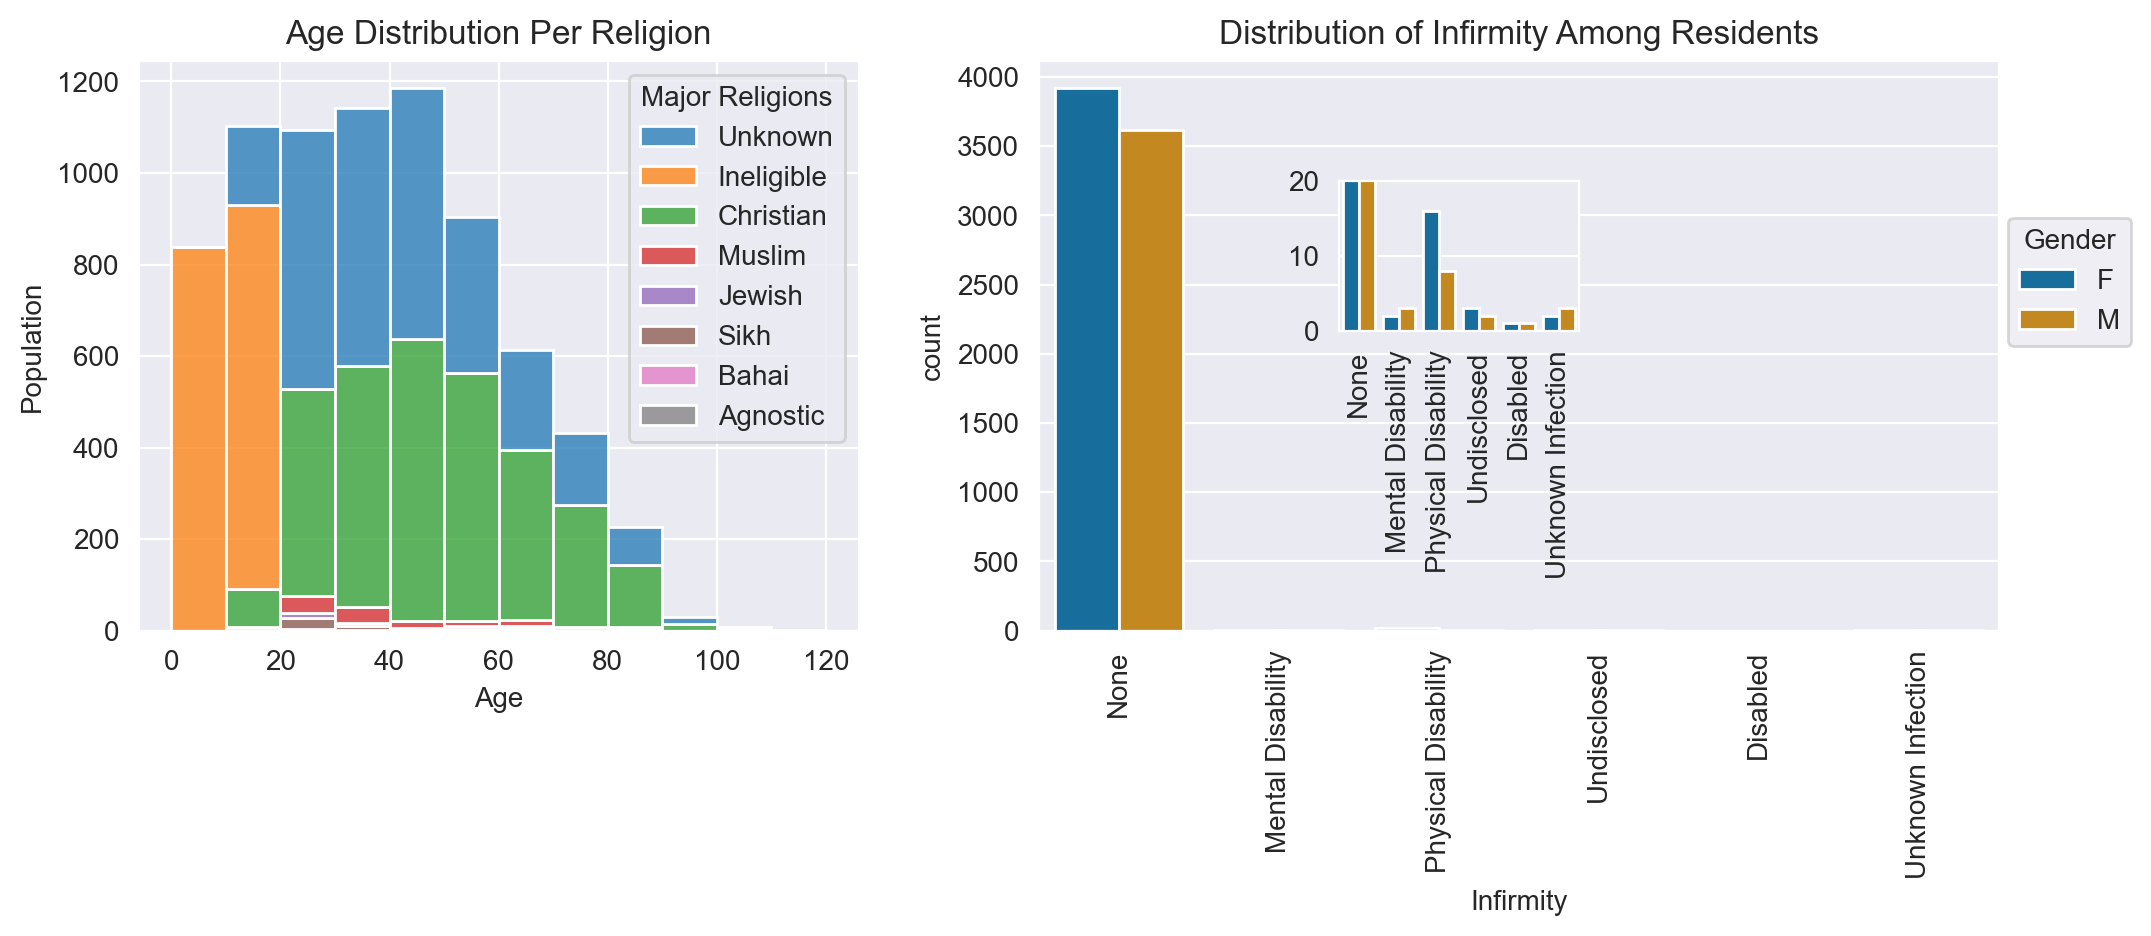

In [242]:
# Age per religion
sns.set_style(style='darkgrid')

age_per_religion_fig = sns.categorical.plt.figure(figsize=(6, 3), dpi=200)
l, r = age_per_religion_fig.add_axes([0, 0, .6, .95]), age_per_religion_fig.add_axes([0.75, 0, .8, .95])

z = age_per_religion_fig.add_axes([1, 0.5, .2, .25])
# pal = sns.dark_palette('blue', 8)

age_per_religion = sns.histplot(data=census_df, x='Age', hue='Major Religions', binwidth=10,
                              multiple='stack', ax=l)
bxplot = sns.countplot(data=census_df, x='Infirmity', hue='Gender', 
                     palette='colorblind', ax=r)

zoomed = sns.countplot(data=census_df, x='Infirmity', hue='Gender', orient='v',
                     palette='colorblind', ax=z)

zoomed.set_ylim(0, 20)

age_per_religion.set_ylabel('Population')

age_per_religion.set_title("Age Distribution Per Religion")
bxplot.set_title("Distribution of Infirmity Among Residents")

sns.move_legend(bxplot, [1.01, 0.5])
zoomed.get_legend().remove(), zoomed.set_xlabel(None), zoomed.set_ylabel(None)

zoomed.set_xticklabels(zoomed.get_xticklabels(), rotation=90)

bxplot.set_xticklabels(bxplot.get_xticklabels(), rotation=90)

# freq.text(0.6, 3000, "Count\n" +
#           "-"*20 + "\n" +
#           f"Retired: {retired_distr.loc[1]}" + "\n" +
#          f"Not Retired: {retired_distr.loc[0]}")

sns.categorical.plt.show()

In [243]:
fname = "Age_distribution_per_religion.png"
cd.fig_writer(fname, age_per_religion_fig)

'Age_distribution_per_religion.png'

___

<center> THE END </center>

___